# Predicting Loan Eligibility of Applicants
 ## Phase 1
  ### Group 22
  - Kar Yenc Natalie Mun (s3991774)
  - Chelsea Wang (s3886626)
  - Livia Nathania Fireta (s3980951)

## Table of contents
  * [Introduction](#intro)
    + [Dataset Source](#ds)
    + [Dataset Details](#dd)
    + [Dataset Features](#df)
    + [Target Feature](#tf)
  * [Goal and Objectives](#goal)
  * [Data Cleaning and Preparation](#prep)
  * [Data Exploration and Visualisation](#vis)
  * [Summary and Conclusions](#sum)
  * [References](#ref)

## Introduction <a id='intro'></a>

### Dataset Source <a id='ds'></a>

The data that our group uses for this assignment is Loan Eligibility dataset. The data is taken from the Kaggle website (Devzohaib,2023). The data shows whether or not an applicant is granted for their loan application based on the information that each applicant provided.  

### Dataset Details <a id='dd'></a>

The dataset consists of 13 variables and 614 observations.The dataset is about customers details provided while they are filling the application form that contains information about Marital Status, Education, Number of Dependents, Employed status, Income, Loan Amount,Loan Term, Credit History and Property areas. The Loan Status is the outcome that each applicant get from the information they have provided. These features seem to be sufficient for an attempt to predict Loan eligibility of applicants.


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Input dataset-home loan data
df = pd.read_csv("Loan_Data.csv")


# Make sure to see all columns of dataset
pd.set_option('display.max_columns', None)

# Display 10 rows of data set randomly
df.sample(10, random_state = 10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
285,LP001924,Male,No,0,Graduate,No,3158,3053.0,89.0,360.0,1.0,Rural,Y
323,LP002055,Female,No,0,Graduate,No,3166,2985.0,132.0,360.0,NaN,Rural,Y
482,LP002537,Male,Yes,0,Graduate,No,2083,3150.0,128.0,360.0,1.0,Semiurban,Y
173,LP001594,Male,Yes,0,Graduate,No,5708,5625.0,187.0,360.0,1.0,Semiurban,Y
518,LP002683,Male,No,0,Graduate,No,4683,1915.0,185.0,360.0,1.0,Semiurban,N
193,LP001658,Male,No,0,Graduate,No,3858,0.0,76.0,360.0,1.0,Semiurban,Y
211,LP001711,Male,Yes,3+,Graduate,No,3430,1250.0,128.0,360.0,0.0,Semiurban,N
97,LP001333,Male,Yes,0,Graduate,No,1977,997.0,50.0,360.0,1.0,Semiurban,Y
140,LP001497,Male,Yes,2,Graduate,No,5042,2083.0,185.0,360.0,1.0,Rural,N
566,LP002836,Male,No,0,Graduate,No,3333,0.0,70.0,360.0,1.0,Urban,Y


### Dataset Features <a id='df'></a>

In [2]:
# Create the features table, include the features name/data type/data(Units)/descriptions
from tabulate import tabulate

table = [['Name','Data Type','Units','Description'],
         ['Married','Nominal categorical','NA','Applicant marriage status (Yes/No)'],
         ['Dependents','Ordinal categorical','NA','Number of dependents'],
         ['Education','Nominal categorical','NA','Applicant education status(Graduate/Not graduate)'],
         ['Self_Employed','Nominal categorical','NA','Applicant self employment status(Yes/No)'],
         ['Total_Income','Numeric','Unknown','Combination of Income between Applicants and Co-applicants'],
         ['LoanAmount','Numeric','Unknown','Amount of Loan (in thousands)'],
         ['Loan_Amount_Term','Numeric','Month','Length of Loan terms (in months)'],
         ['Credit_History','Binary','NA','Number of credit history, 1 means yes, 0 means not'],
         ['Property_Area','Nominal categorical','NA','The area of property that applicants living \n(Urban, Semi Urban, Rural)'],
         ['Loan_Status','Nominal categorical','NA','Loan eligibility(Yes/No)']]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒══════════════════╤═════════════════════╤═════════╤════════════════════════════════════════════════════════════╕
│ Name             │ Data Type           │ Units   │ Description                                                │
╞══════════════════╪═════════════════════╪═════════╪════════════════════════════════════════════════════════════╡
│ Married          │ Nominal categorical │ NA      │ Applicant marriage status (Yes/No)                         │
├──────────────────┼─────────────────────┼─────────┼────────────────────────────────────────────────────────────┤
│ Dependents       │ Ordinal categorical │ NA      │ Number of dependents                                       │
├──────────────────┼─────────────────────┼─────────┼────────────────────────────────────────────────────────────┤
│ Education        │ Nominal categorical │ NA      │ Applicant education status(Graduate/Not graduate)          │
├──────────────────┼─────────────────────┼─────────┼────────────────────────────────────

### Target Feature <a id='tf'></a>

The target feature from our dataset is Loan status variable. The Loan Status is a categorical feature where it is either yes or no. If `Yes`, this indicates that the individual was granted the home loan. If `No`, the individual's loan was rejected. This variable will be predicted based on the rest of variables that have been mentioned above.

## Goal and Objectives <a id='goal'></a>

Loan eligibility classification is crucial to bank which lead to the building of a prediction model that automatically classifies the loan status of applicants. The model will help the company to validate the applicants' eligibility and also improve the processing efficiency. In this case, the analysis aims to classify the loan eligibility for applicants based on their information they provided, such as married status, education, self employed status, total income, loan amount, credit history and many more features.

The objectives of the analysis (for phase 1) are as following:
- Explore the relationship between the selected variables.
- Find which features that would be the best predictors of loan eligibility.

## Data Cleaning and Preparation <a id='prep'></a>

Prior to the visualisation and exploration of data, the data set is first prepared and cleaned. The data cleaning steps of the Loan Eligibility data is shown as below:

### Data cleaning steps:
- Drop irrelevant features in dataset
- Check for white spaces
- Create new variable from existing variables
- Check for missing values and replace missing values

In [3]:
# Data features and shape summary
print(df.columns)
print(df.shape)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
(614, 13)


The output above shows the columns that exists in our dataset. We also check the dimension of dataset that has 614 rows and 13 variables. 

In [4]:
# Check the dataset variables type
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

The data type of each feature has also been checked. All of the features already has the correct data type assigned to it. 

In [5]:
# Checking for any whitespaces within the columns
space = df.astype(str).apply(lambda x: x.str.contains(r'^\s+')).any()
print(space)

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool


The presence of whitespaces have also been checked for each column. From the output, it shows that all column do not contain any whitespaces.

In [6]:
#Drop the variables "Loan_ID" and "Gender" then check
# df = df.drop(columns = ["Loan_ID","Gender"])
# df

The `Loan_ID` is dropped since `Loan_ID` is an irrelevant information for the prediction of Loan eligibilty. We have also dropped the `Gender` feature from the dataset. This is due to `Gender` feature having not much influence on predicting loan outcome.

In [7]:
#Compute the total income for further analysis
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Total_Income']

0      5849.0
1      6091.0
2      3000.0
3      4941.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8312.0
612    7583.0
613    4583.0
Name: Total_Income, Length: 614, dtype: float64

In [8]:
# df = df.drop(columns = ["ApplicantIncome","CoapplicantIncome"])
# df

For further analysis, we have created a new feature `Total_Income` from the `ApplicantIncome` and `CoapplicantIncome` features. Since both `ApplicantIncome` and `CoapplicantIncome` have similar information, we decided to combine both variables into `Total_Income`. Hence, we will use `Total_Income` for our further analysis and dropping both the `ApplicantIncome` and `CoapplicantIncome`.

In [9]:
#Output the missing values summary
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

We checked whether the dataset has any missing values. Missing values were observed for the `Married`, `Dependents`, `Self_Employed`, `LoanAmount`, `Loan_Amount_Term`, `Credit_History` features. We decided to fill in the missing values instead of dropping it as the missing values are more than 5% of the data. The missing values will be replaced with different measures of center such as mean, median or mode depending on the nature of the feature. For categorical features, we decided to fill in the missing values with the mode value. Whereas, for numerical features, we can choose to fill in the missing values with the mean or median values.


In [10]:
#Output the Married --> values counts then replace missing value with the mode value
print(df['Married'].value_counts(dropna = False))
df['Married'].fillna(df['Married'].mode()[0],inplace = True)
df['Married'].value_counts(dropna = False)

Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64


Married
Yes    401
No     213
Name: count, dtype: int64

We filled the null values for the `Married` feature with mode.
After filling the missing values with mode, the `Yes` value increased by 3 since `Yes` is the most frequently occurring value for this feature.

In [11]:
#Output the dependents --> values counts then replace missing value with the mode value
print(df['Dependents'].value_counts(dropna = False))
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace = True)
df['Dependents'].value_counts(dropna = False)

Dependents
0      345
1      102
2      101
3+      51
NaN     15
Name: count, dtype: int64


Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

We filled the missing values for the `Dependents` feature with mode values as well. After filling the missing values with the mode, the `0` value count increased by 15.

In [12]:
#Output the self employed --> values counts then replace missing value with the mode value
print(df['Self_Employed'].value_counts(dropna = False))
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace = True)
df['Self_Employed'].value_counts(dropna = False)

Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64


Self_Employed
No     532
Yes     82
Name: count, dtype: int64

We filled the missing values for the `Self_Employed` with the mode value. After filling the missing values with the mode, the `Yes` value increased by 32.

In [13]:
# #Output the loan amount --> values counts then replace missing value with median value
# print(df['LoanAmount'].value_counts(dropna = False))
# # Since Loan amount is a numerical variable so impute with median
# df['LoanAmount'].fillna(float(df['LoanAmount'].median()),inplace = True)
# df['LoanAmount'].value_counts(dropna = False)

We filled the missing values for the `LoanAmount` with the median value. The median value of `LoanAmount` has been calculated to be 128. Therefore, 22 missing values are filled with this value.

In [14]:
#Output the loan amount term --> values counts then replace missing value with the median value
print(df['Loan_Amount_Term'].value_counts(dropna = False))
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace = True)
df['Loan_Amount_Term'].value_counts(dropna = False)

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64


Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

We filled the missing values of `Loan_Amount_Term` with the mode value. After filling in, the number of the loan amount term of 360 increased by 14.

In [15]:
# #Output the credit history --> values counts then replace missing value with the mode value
# print(df['Credit_History'].value_counts(dropna = False))
# df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace = True)
# df['Credit_History'].value_counts(dropna = False)

In [16]:
df.to_csv('LoanAmount_cleaned.csv', index = False)

We also filled the missing values of `Credit_History` with the mode value as well. After filling in, the number of credit history of `1` increased by 50.

In [16]:
# Descriptive analysis of numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0
Total_Income,614.0,7024.705081,6458.663872,1442.0,4166.0,5416.5,7521.75,81000.0


In [17]:
# Decriptive analysis of categorical variable
df.describe(include='object').T

,count,unique,top,freq
Loan_ID,614,614,LP001002,1
Gender,601,2,Male,489
Married,614,2,Yes,401
Dependents,614,4,0,360
Education,614,2,Graduate,480
Self_Employed,614,2,No,532
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


Furthermore, we do a descriptive analysis for both the numerical variables and the categorical variables. From the descriptive analysis above, it can be seen that most of numerical feature in our data set has a high variability in it. This be seen from the high standard deviation and range for each of the feature in the numerical descriptive statistic. Furthermore, it is likely that the data is not normally distributed as the mean are siginificantly different from its median. Lastly, more details regarding outliers will be conducted in the data exploration and visualisation section.

In [18]:
#Output that summarise all categorical variables values
columns = df.columns[df.dtypes==object].tolist()

for col in columns:
    print('Categorical value for ' + col)
    print(df[col].value_counts())
    print('')

Categorical value for Loan_ID
Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64

Categorical value for Gender
Gender
Male      489
Female    112
Name: count, dtype: int64

Categorical value for Married
Married
Yes    401
No     213
Name: count, dtype: int64

Categorical value for Dependents
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

Categorical value for Education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

Categorical value for Self_Employed
Self_Employed
No     532
Yes     82
Name: count, dtype: int64

Categorical value for Property_Area
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

Categorical value for Loan_Status
Loan_Status
Y    422
N    192
Name: count, dtype: int64



To ensure that there are no repetition within the categorical variables, the unique values are computed. From the output, it can be seen that there are no features that have repetitive values in it and no missing values in all of the features.

In [19]:
target = df['Loan_Status']
df_new = df.drop(columns = 'Loan_Status')
target.replace({"Y":1, "N":0}, inplace = True)
target.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [20]:
df_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,7583.0


## Data Exploration and Visualisation <a id='vis'></a>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")
import seaborn as sns

### Univariate visualisation

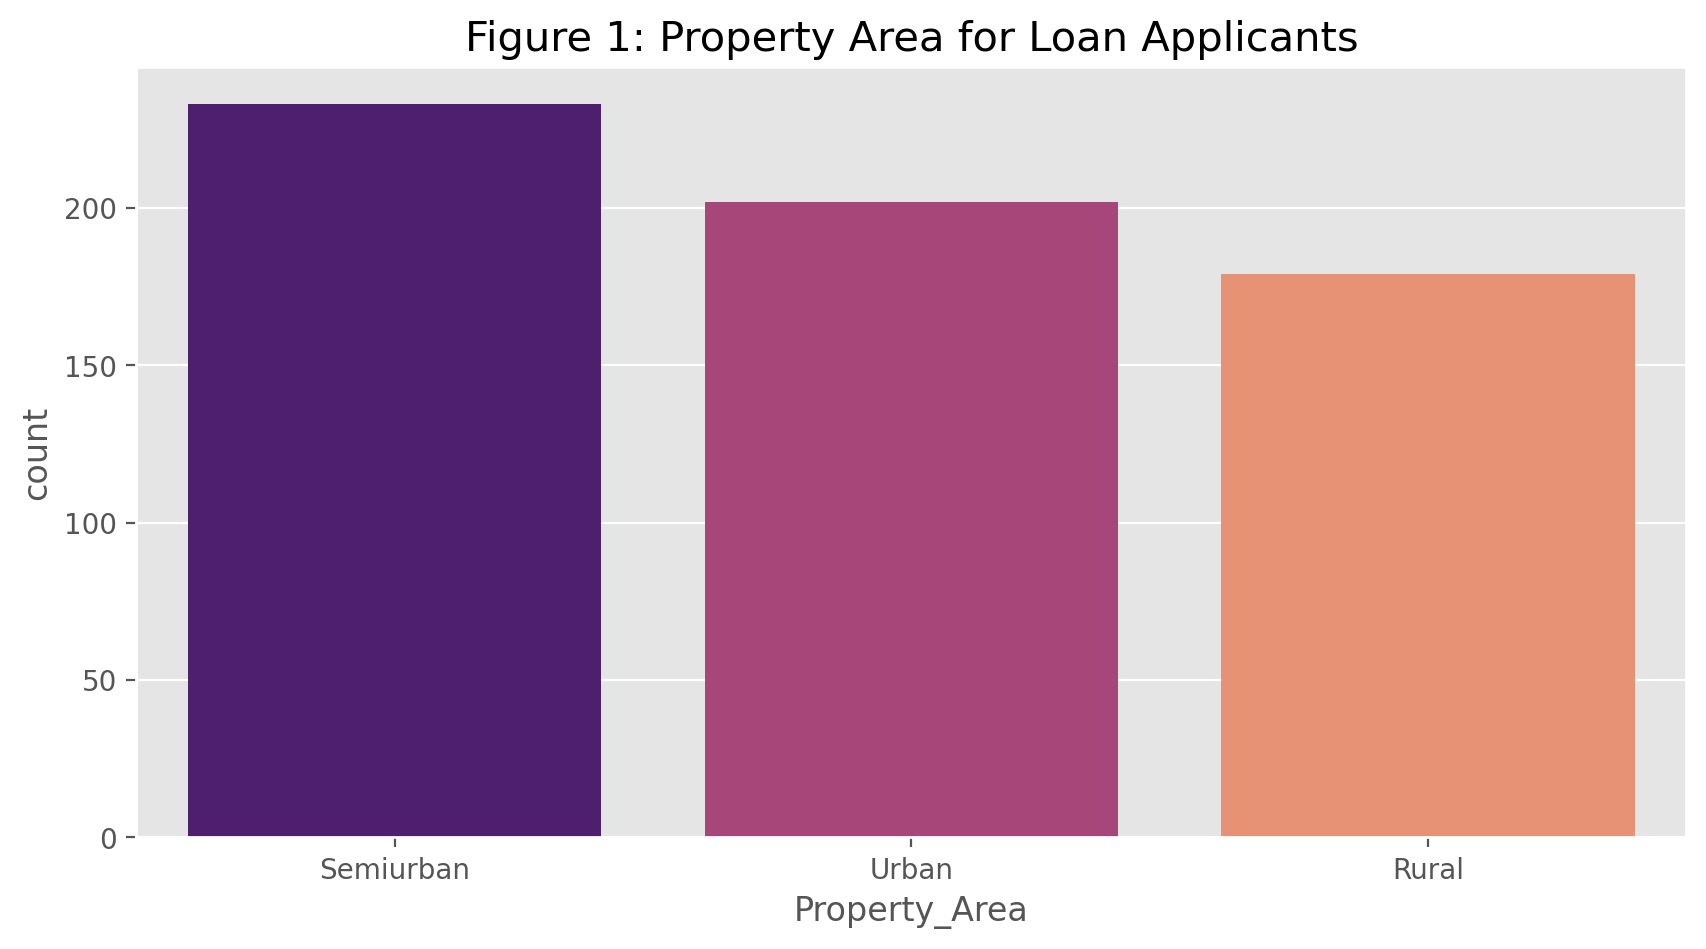

In [23]:
# Figure 1: Property Area for Loan Applicants
plt.figure(figsize = (10,5))
fig = sns.countplot(x = 'Property_Area', data = df, palette = 'magma',
                    order = df['Property_Area'].value_counts().index)
fig = plt.title('Figure 1: Property Area for Loan Applicants', fontsize = 15)
plt.show()

Figure 1 shows the count of property area that the loan applicants are living in. Based on the plot above, most loan applicants are living in the semi-urban area while the lowest property area is the rural area. 

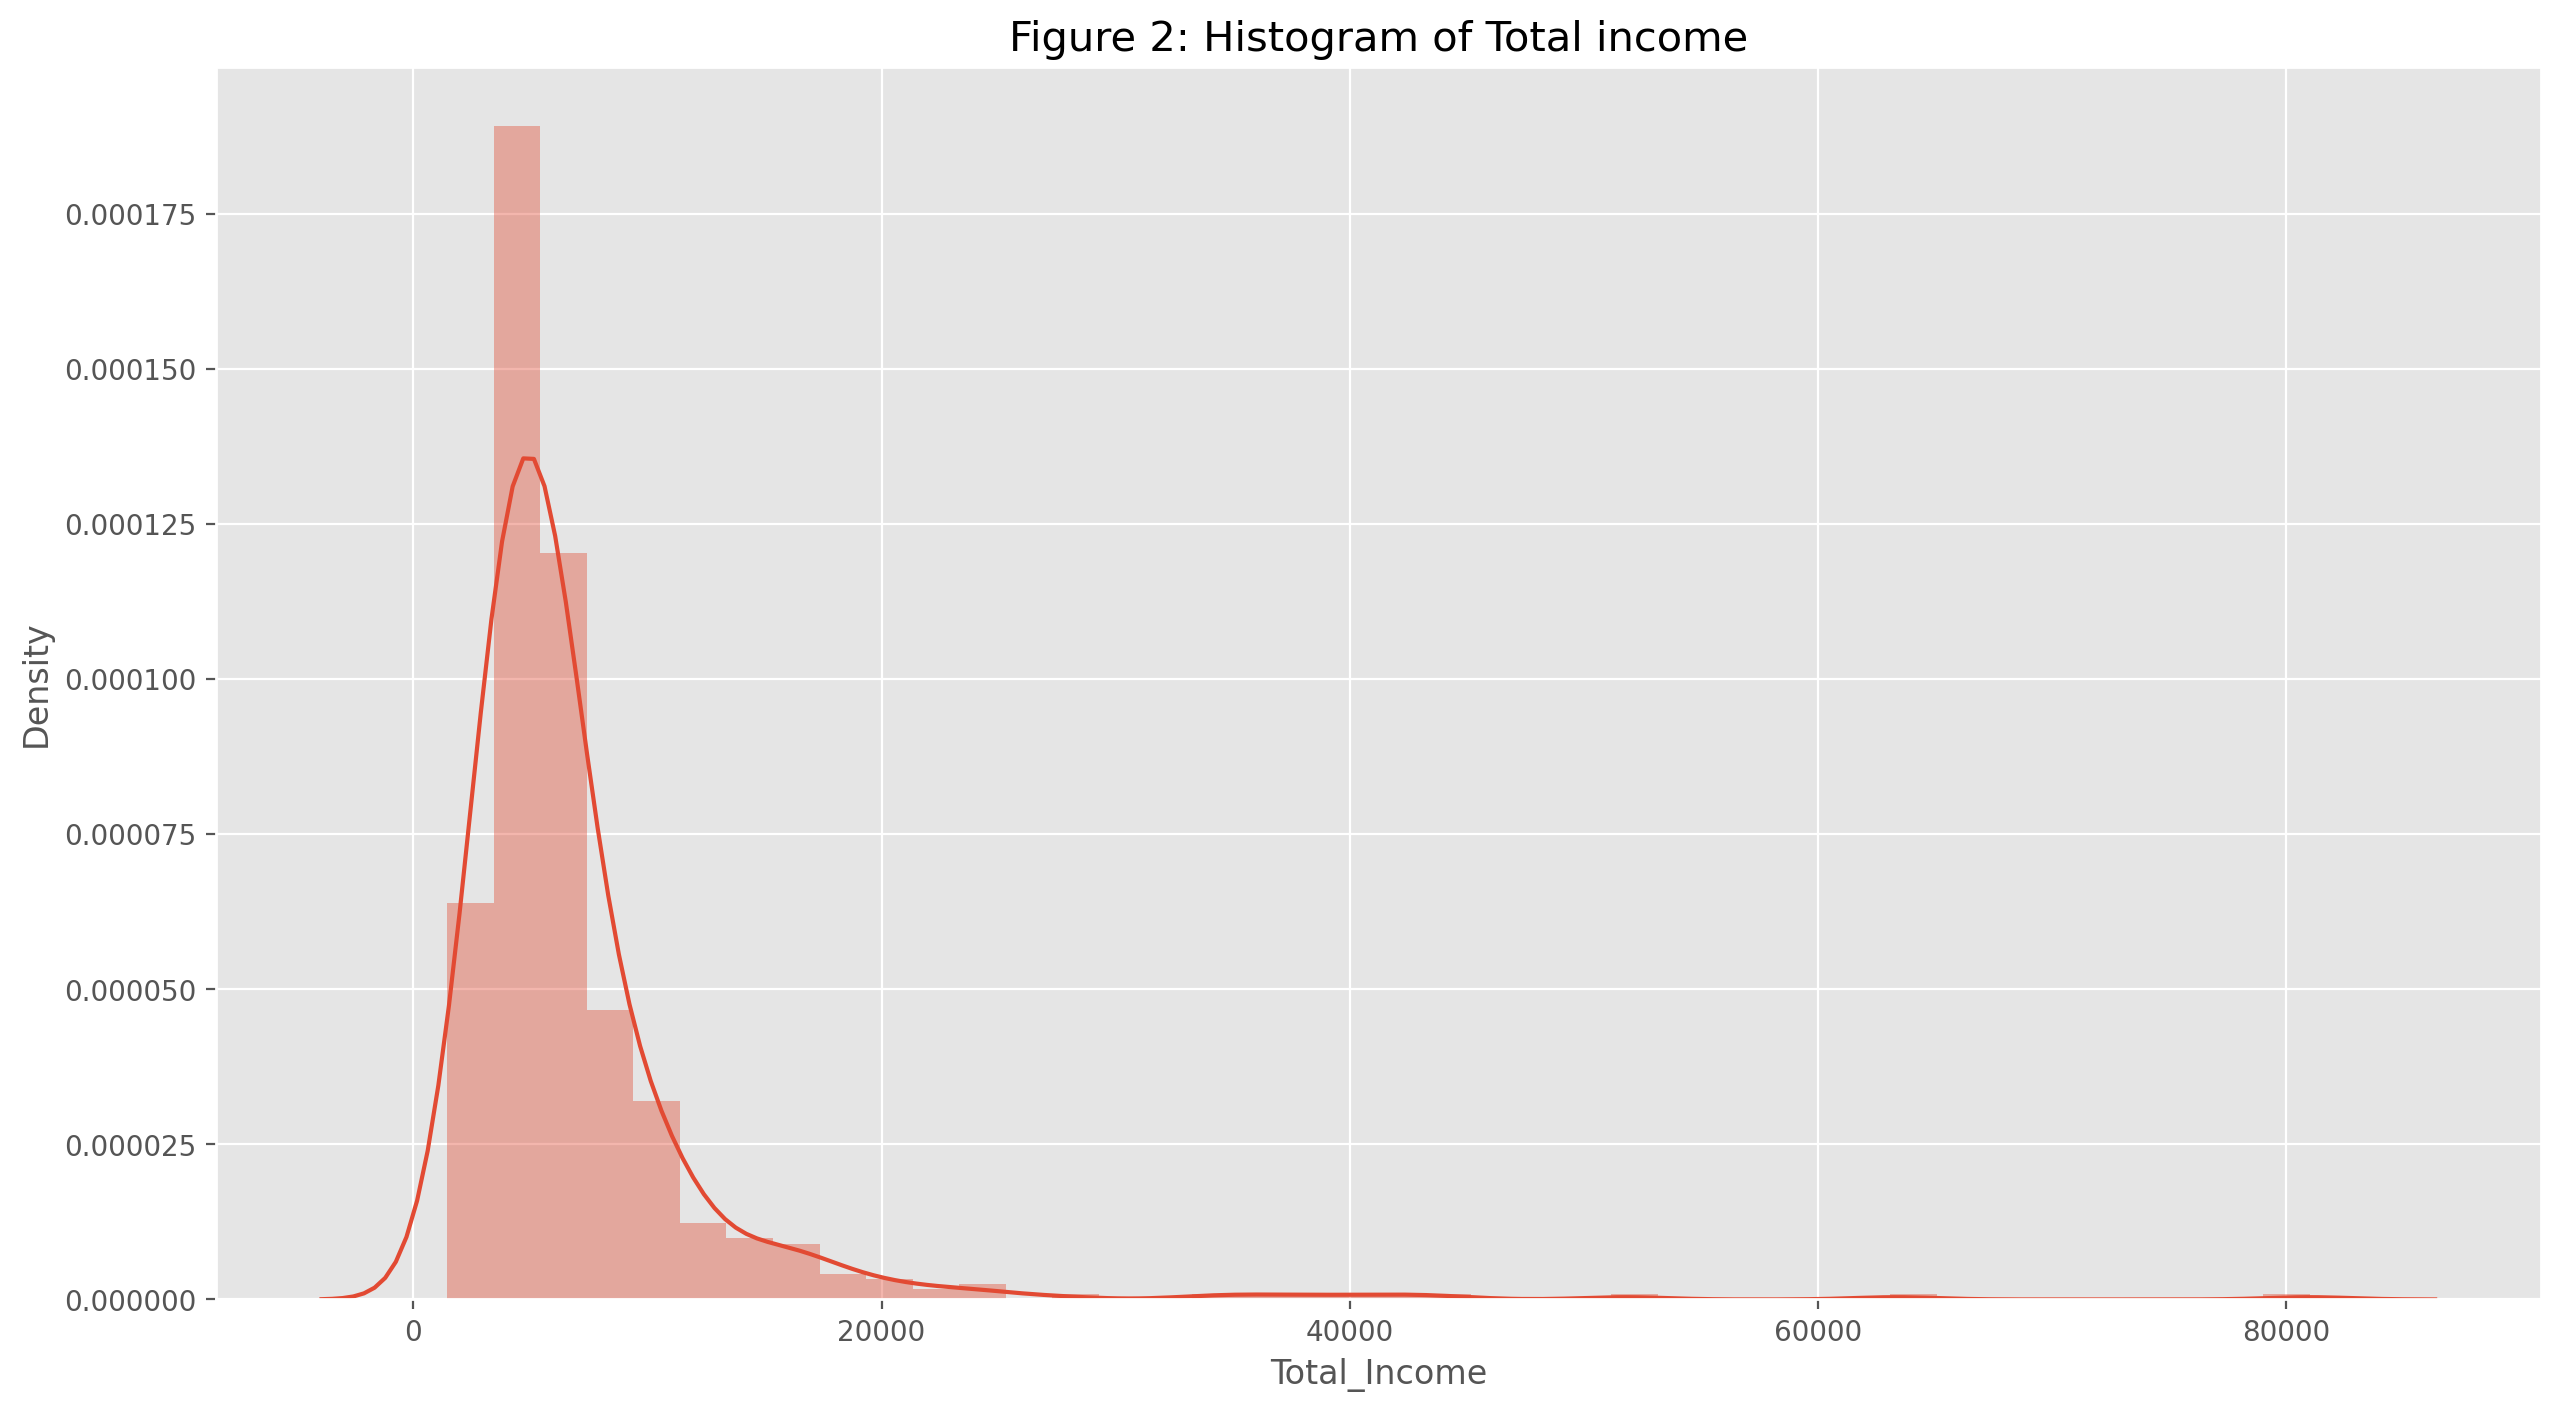

In [24]:
# Figure 2: Histogram of Total Income
plt.figure(figsize = (15,8))
sns.distplot(df['Total_Income'], kde=True, bins=40).set_title('Figure 2: Histogram of Total income', fontsize = 15)
plt.show();

Figure 2 above depicts the distribution of the total income of the loan applicants. The histogram shows that the distribution of the total income is right skewed. This indicates that most observation is on the lower side of the distribution and the long right tail of the histogram reveals that there are outliers in the total income variables. In this case, although total income variable has many outliers, we do not remove those outliers due to the nature of the data. However, since there are many outliers of the Total income variables, a transformation may be required in phase 2 to reduce the variability in it.

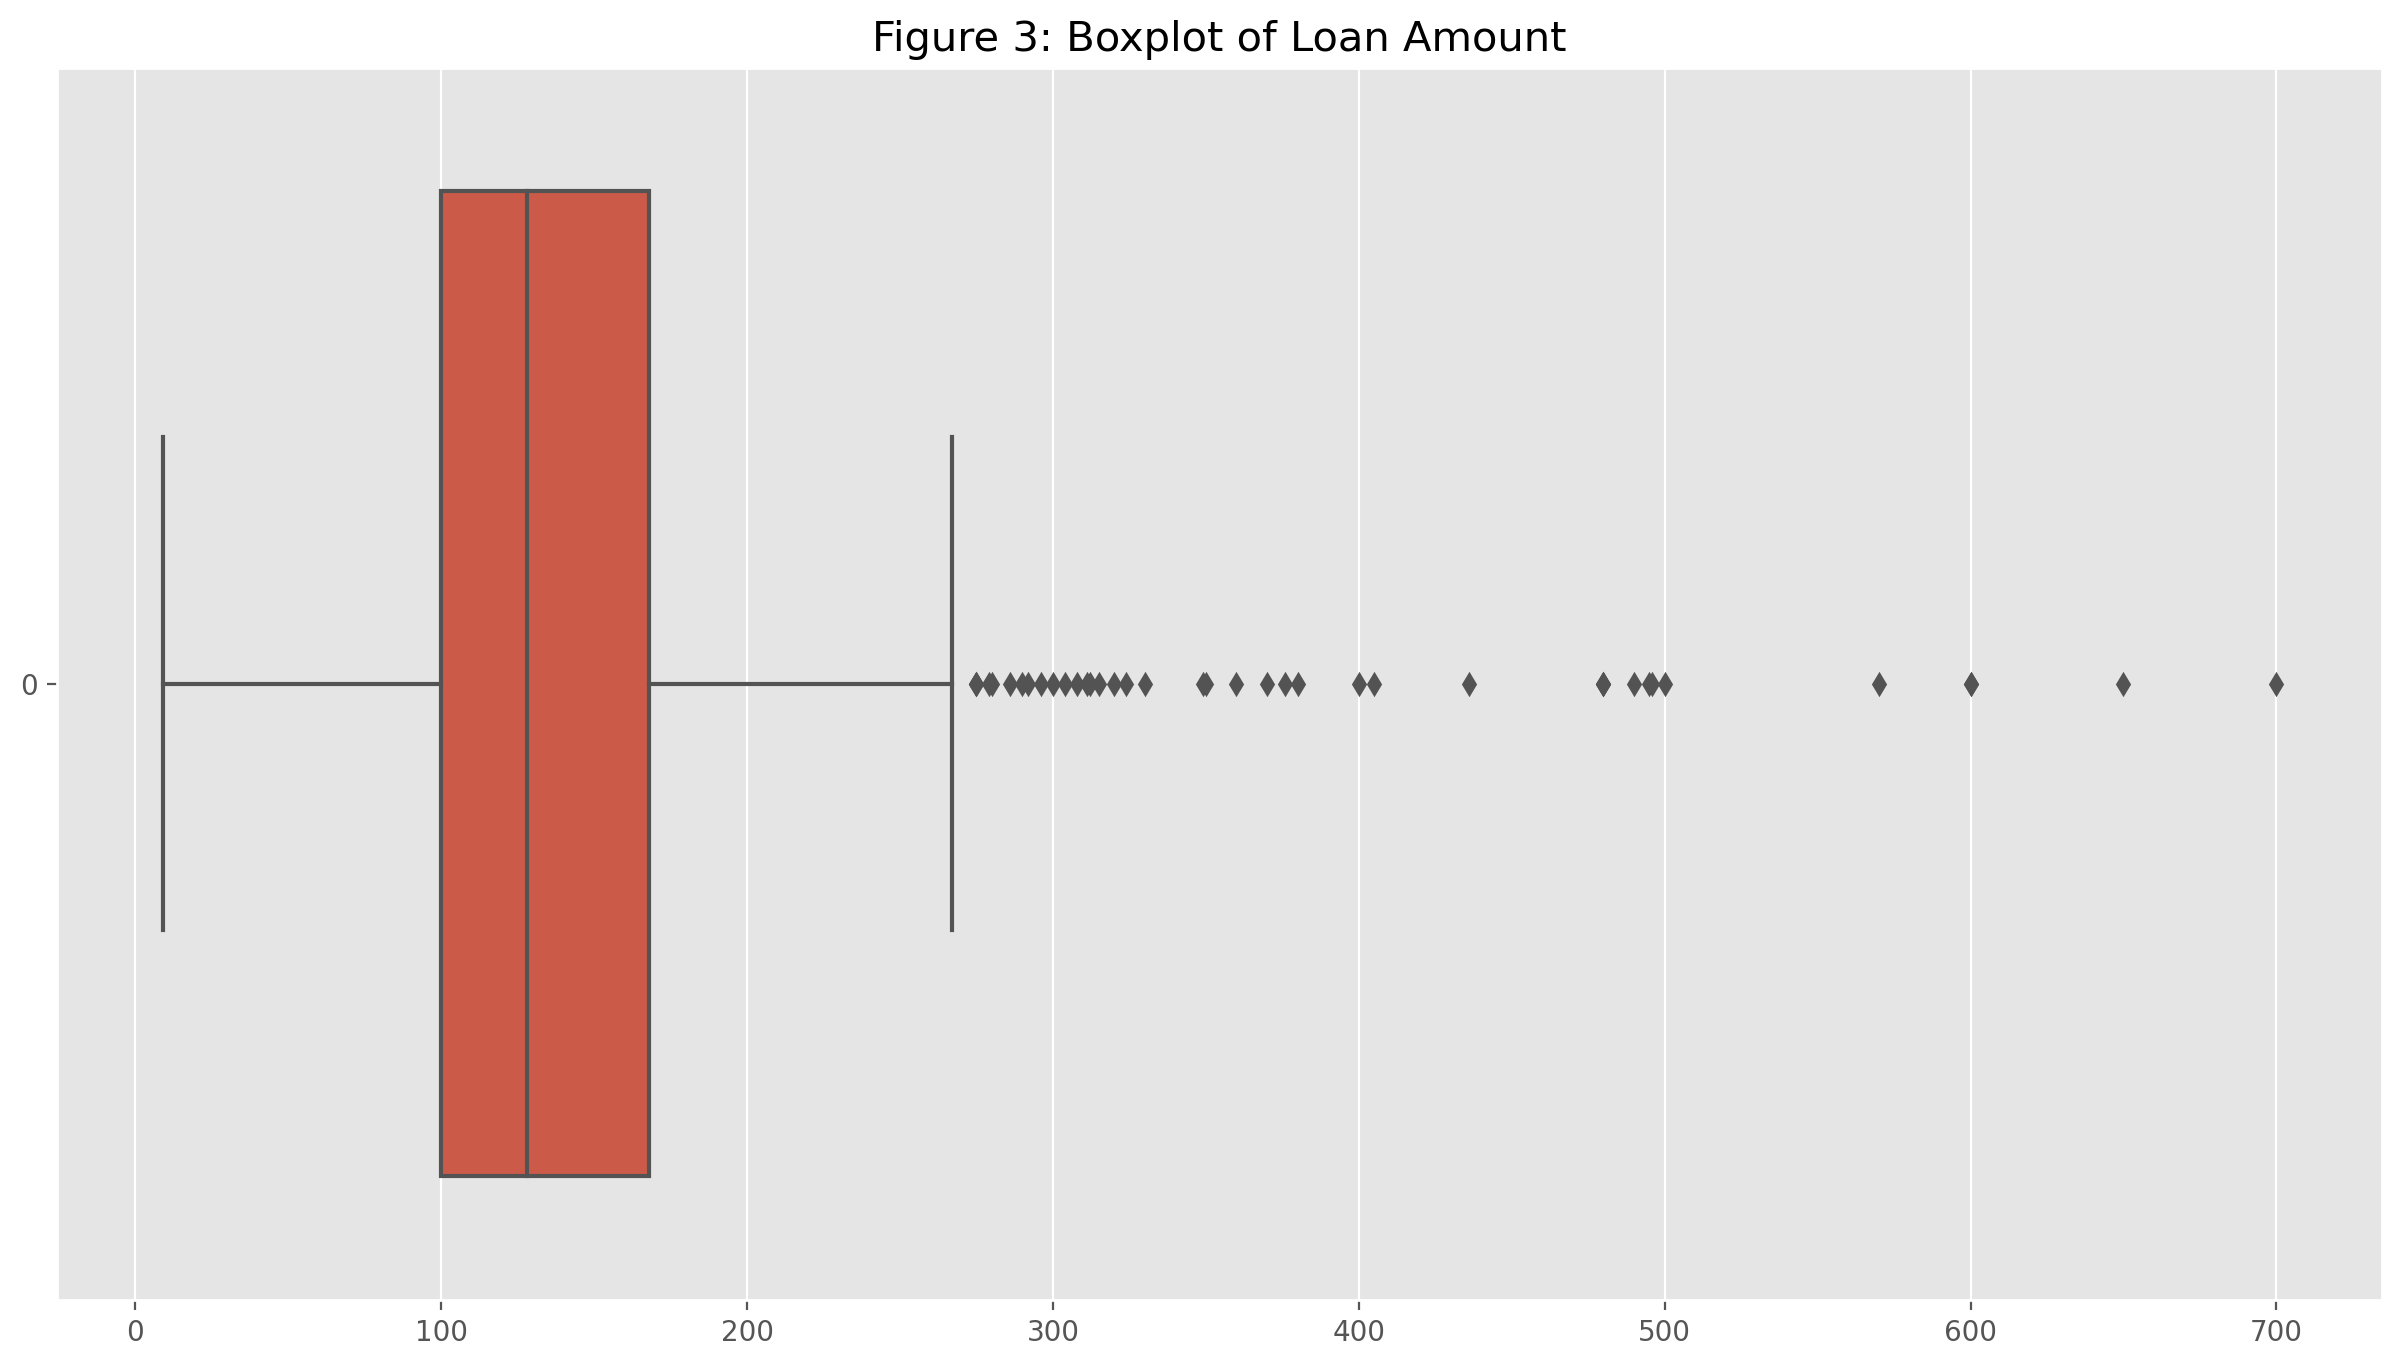

In [25]:
# Figure 3: Boxplot of Total Income 
plt.figure(figsize = (15,8))
sns.boxplot(df['LoanAmount'], orient = "h")
plt.title('Figure 3: Boxplot of Loan Amount', fontsize = 15)
plt.show();

Figure 3 of the Loan Amount also suggests that there are many outliers in the Loan Amount features. This can be seen from the points that are above the upper whisker of the boxplot. However, on the lower whisker of the boxplot, there is not any presence of the outlier. Hence, the boxplot depicts the Loan Amount features distribution likely to be right skewed. Furthermore, similarly to the Total Income, due to the nature of the Loan Amount feature we do not remove the outliers of the data.

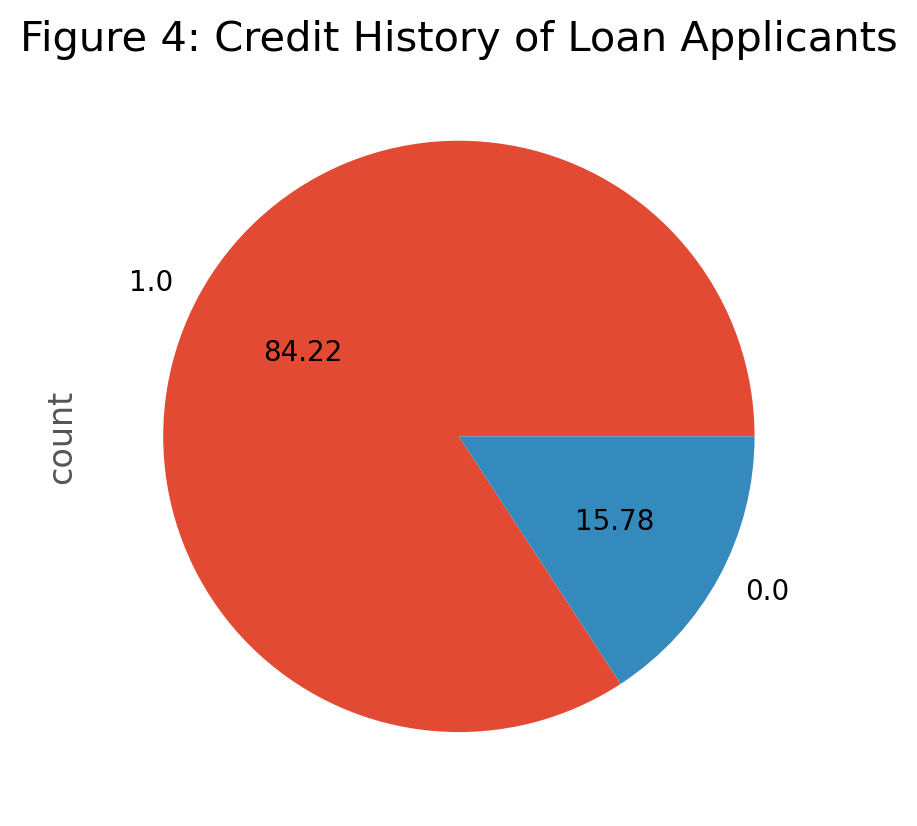

In [26]:
# Figure 4: Pie Chart of Education
df_edu =df['Credit_History'].value_counts()
df_edu.plot(kind='pie',autopct='%.2f')
fig = plt.title('Figure 4: Credit History of Loan Applicants', fontsize = 15)
plt.show()

The pie chart of the credit history of loan applicants is shown by figure 4. From the pie chart, it can be observed that 85.5% of the loan applicants have credit history while only a small number of the applicants (14.5%) do not have credit history previously.

### Two Variable Visualisation

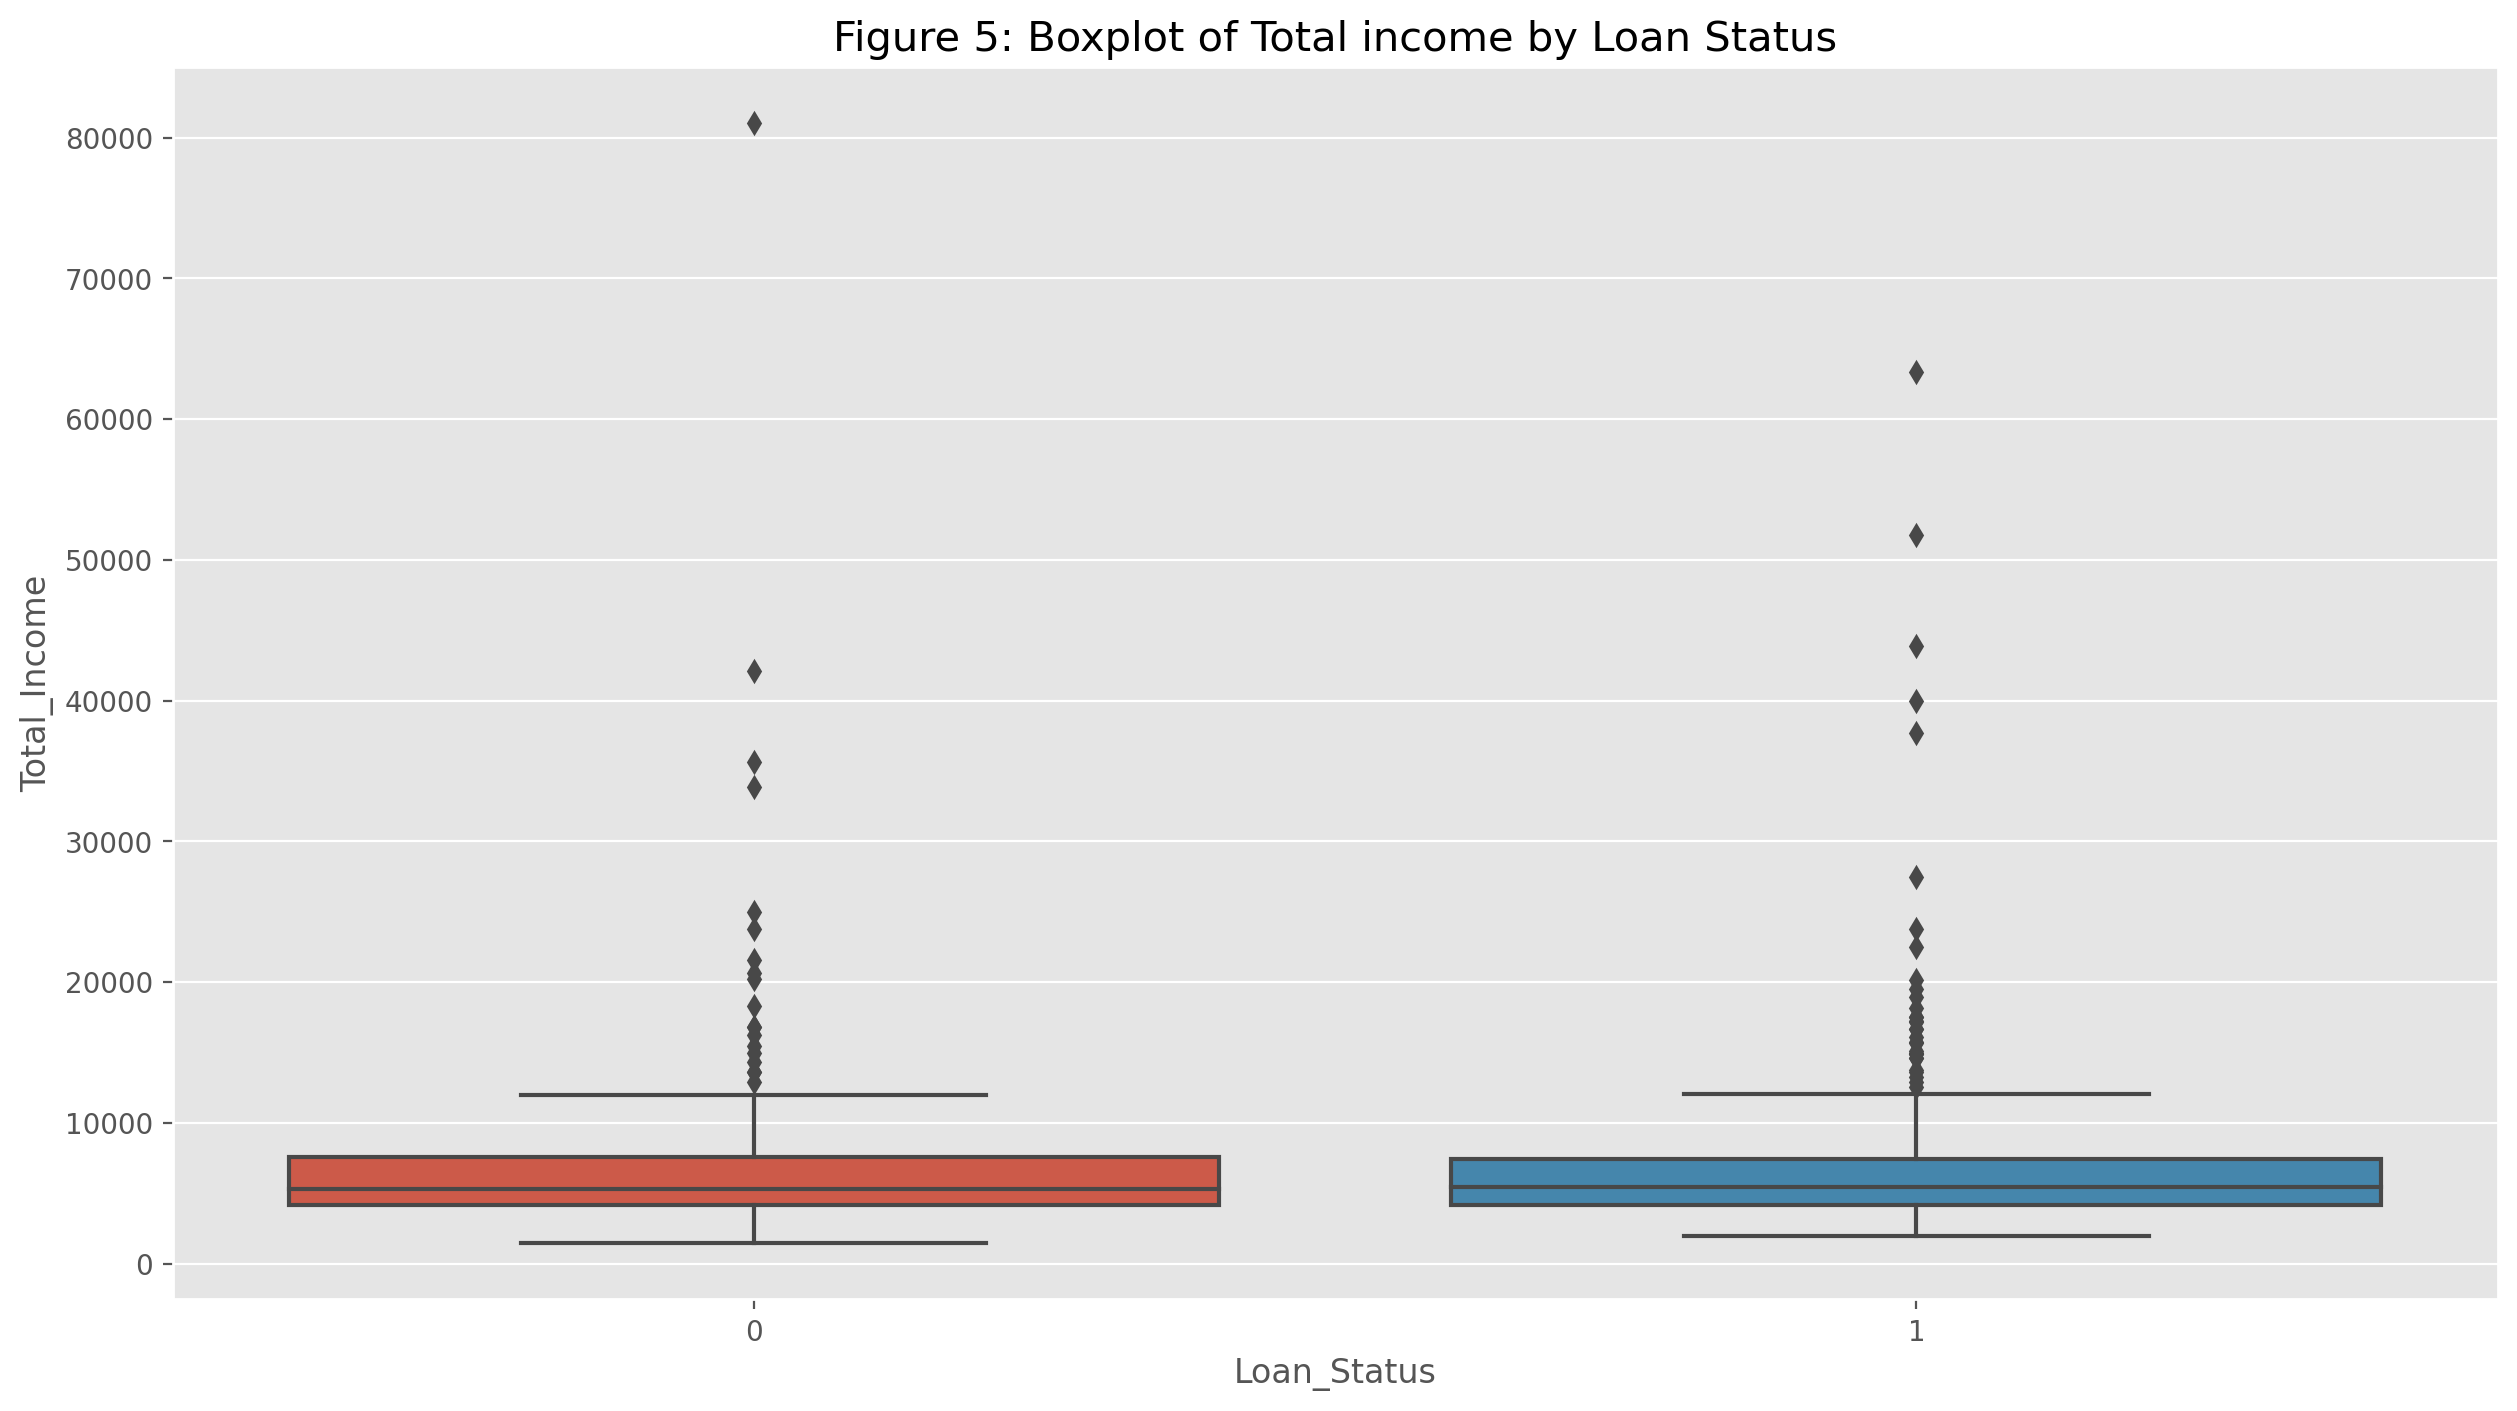

In [27]:
# Figure 5: Boxplot of Total Income by Loan Status
plt.figure(figsize = (15,8))
sns.boxplot(x=df['Loan_Status'], y=df['Total_Income']);
plt.title('Figure 5: Boxplot of Total income by Loan Status', fontsize = 15)
plt.show();

The boxplot of Total Income by Loan Status is depicted by Figure 5. The boxplot shows that for the applicant whose loan are approved (Loan Status: 1) have a higher median value compared to those whose loan is not approved (Loan Status: 0). The minimum for those loan that is approved is higher compared to the loan that is not approved. The maximum for those loan is approved is higher than those loan is not approved. The upper whisker for whose loan is approved is longer than that those loan that is not approved which means that there are more applicants who have higher total income. The lower whisker for those loan that is approved is shorter than those loan that is not approved which represents that there are less applicants who have lower total income. Therefore, the applicants with higher total income will be easier to get their loan approved (Loan status:1) in this case. 

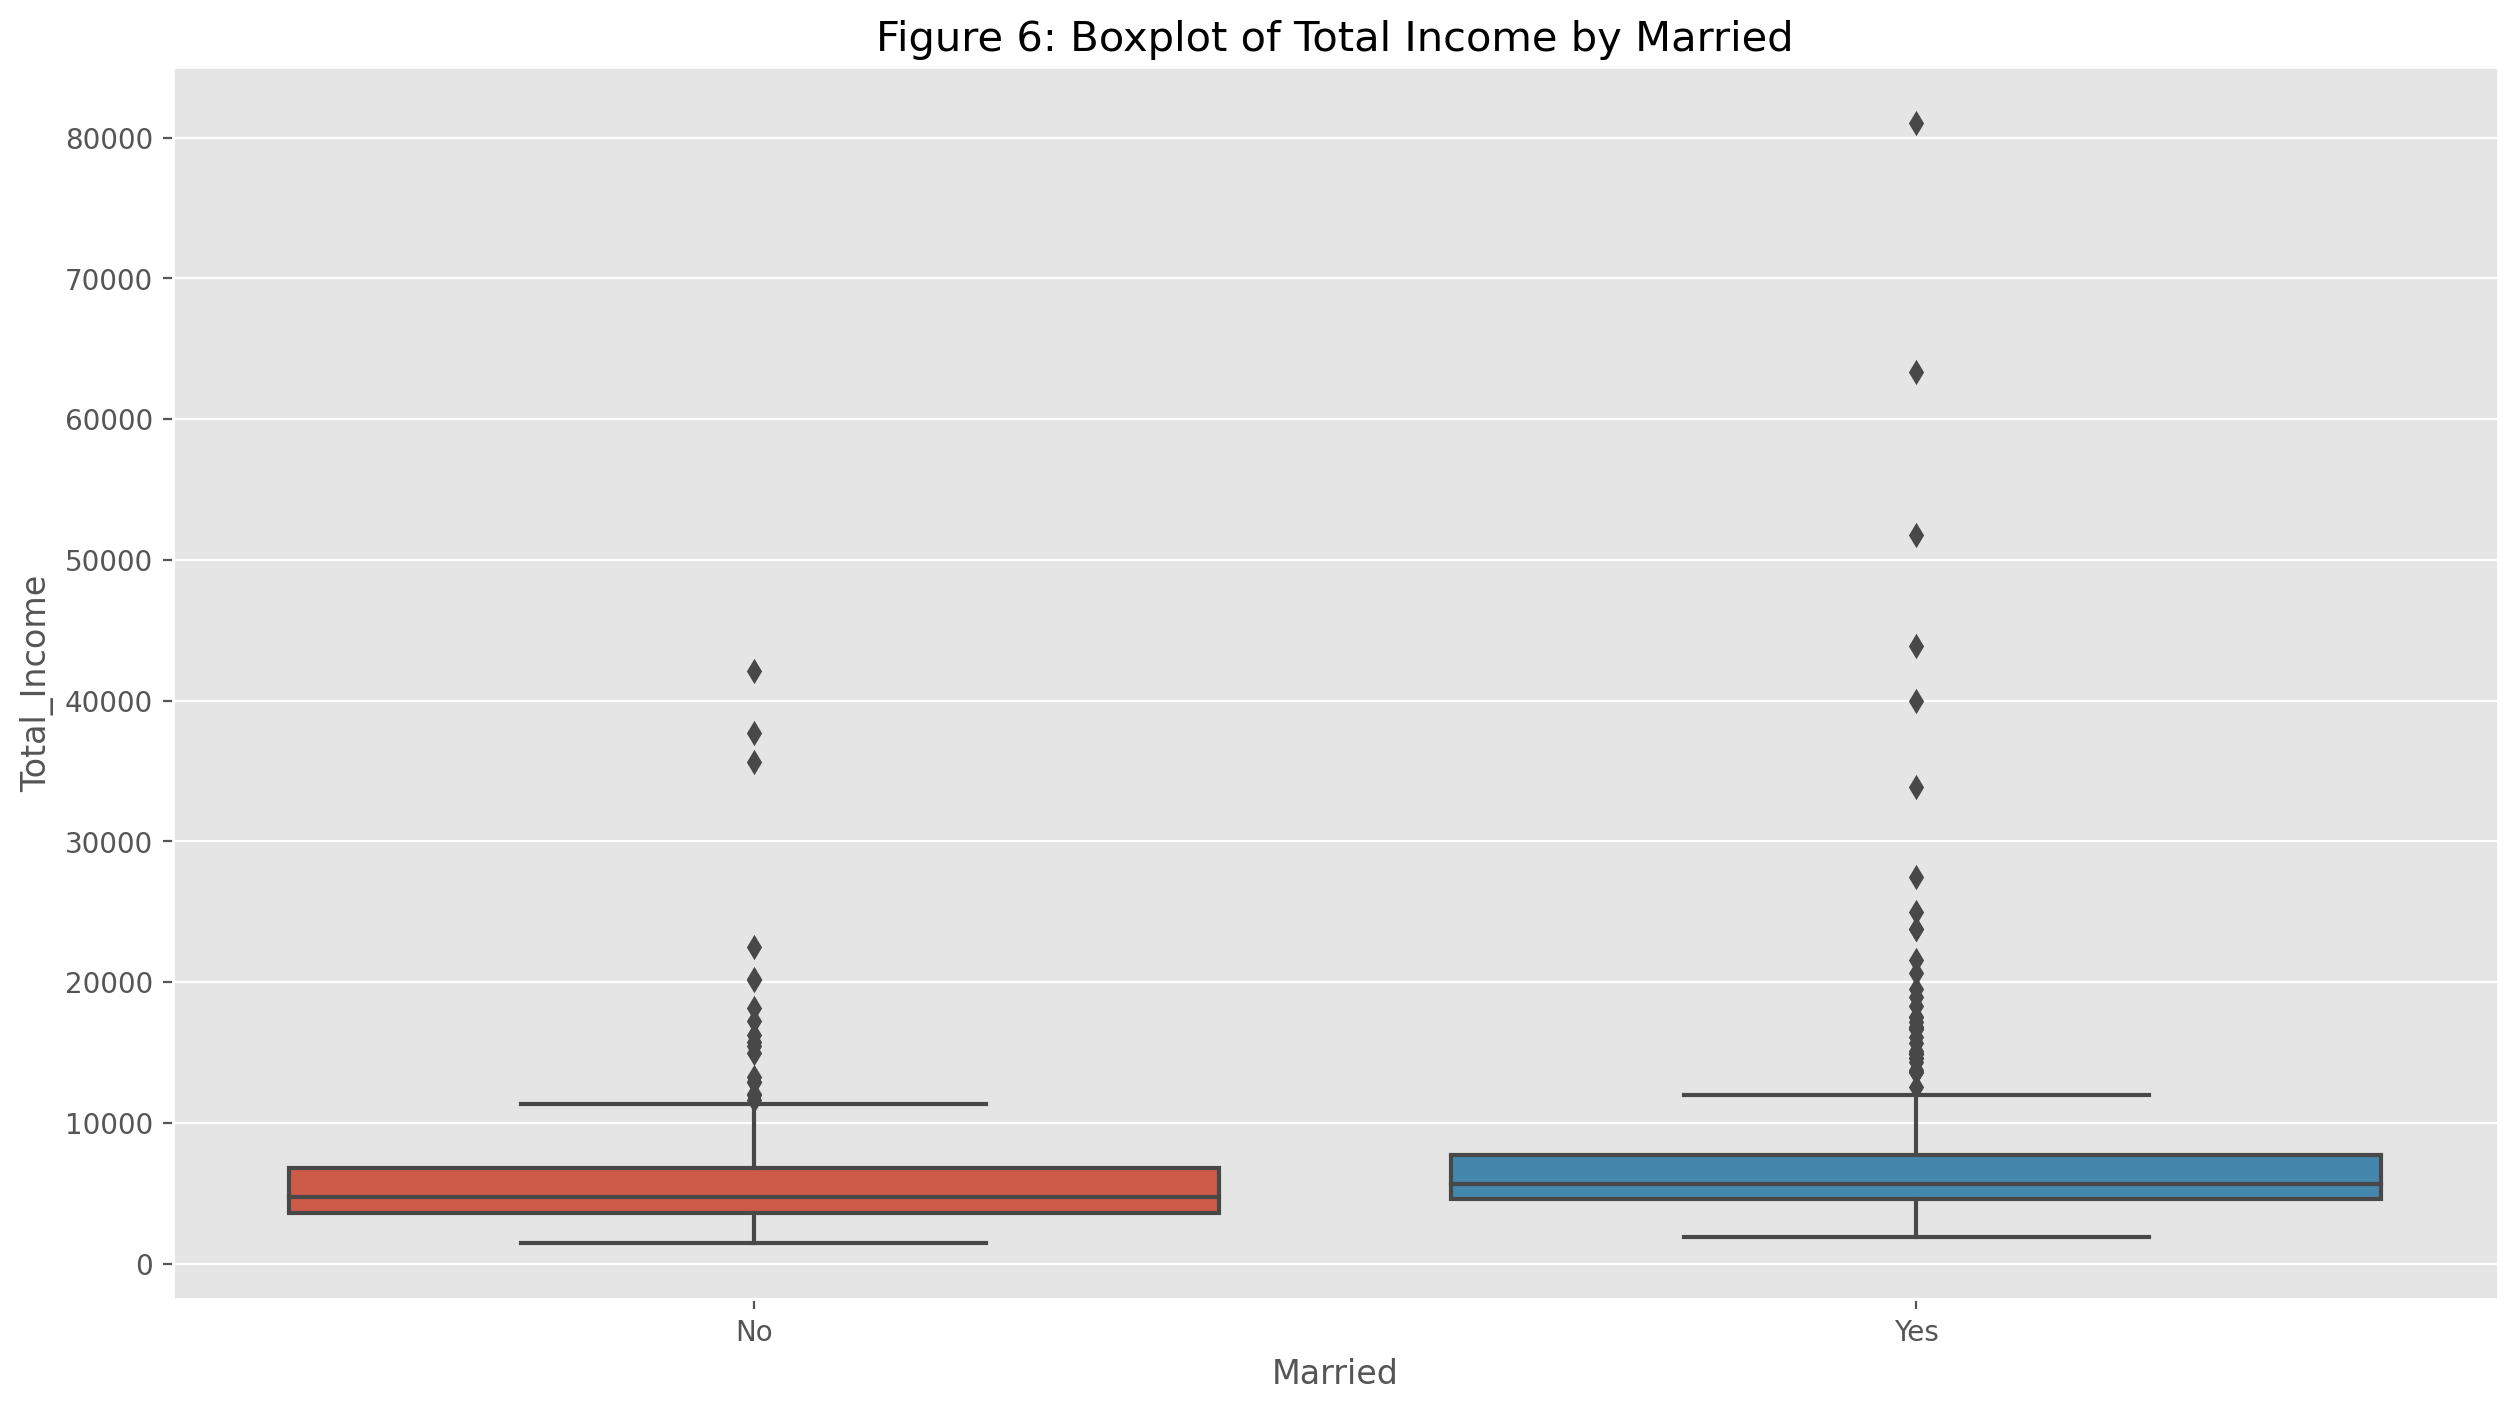

In [28]:
# Figure 6: Boxplot of Total Income by Married
plt.figure(figsize = (15,8))
sns.boxplot(x=df['Married'], y=df['Total_Income']);
plt.title('Figure 6: Boxplot of Total Income by Married', fontsize = 15)
plt.show();

Moreover, the boxplot of total income by marriage status is shown as above (Figure 6). The boxplot shows that those who are married (married status:yes) will have higher total income compared to those who are not married. This can be seen from the box plot where those who are married have greater range and higher median. From the outliers of the boxplot, it also can be observed where the outliers data for those that have married has higher points compared to those who have not. This is possibly due to the Total income feature being a combination of Applicant income and Co-applicant income which results for those who have married to have higher total income compared to those who have not married.

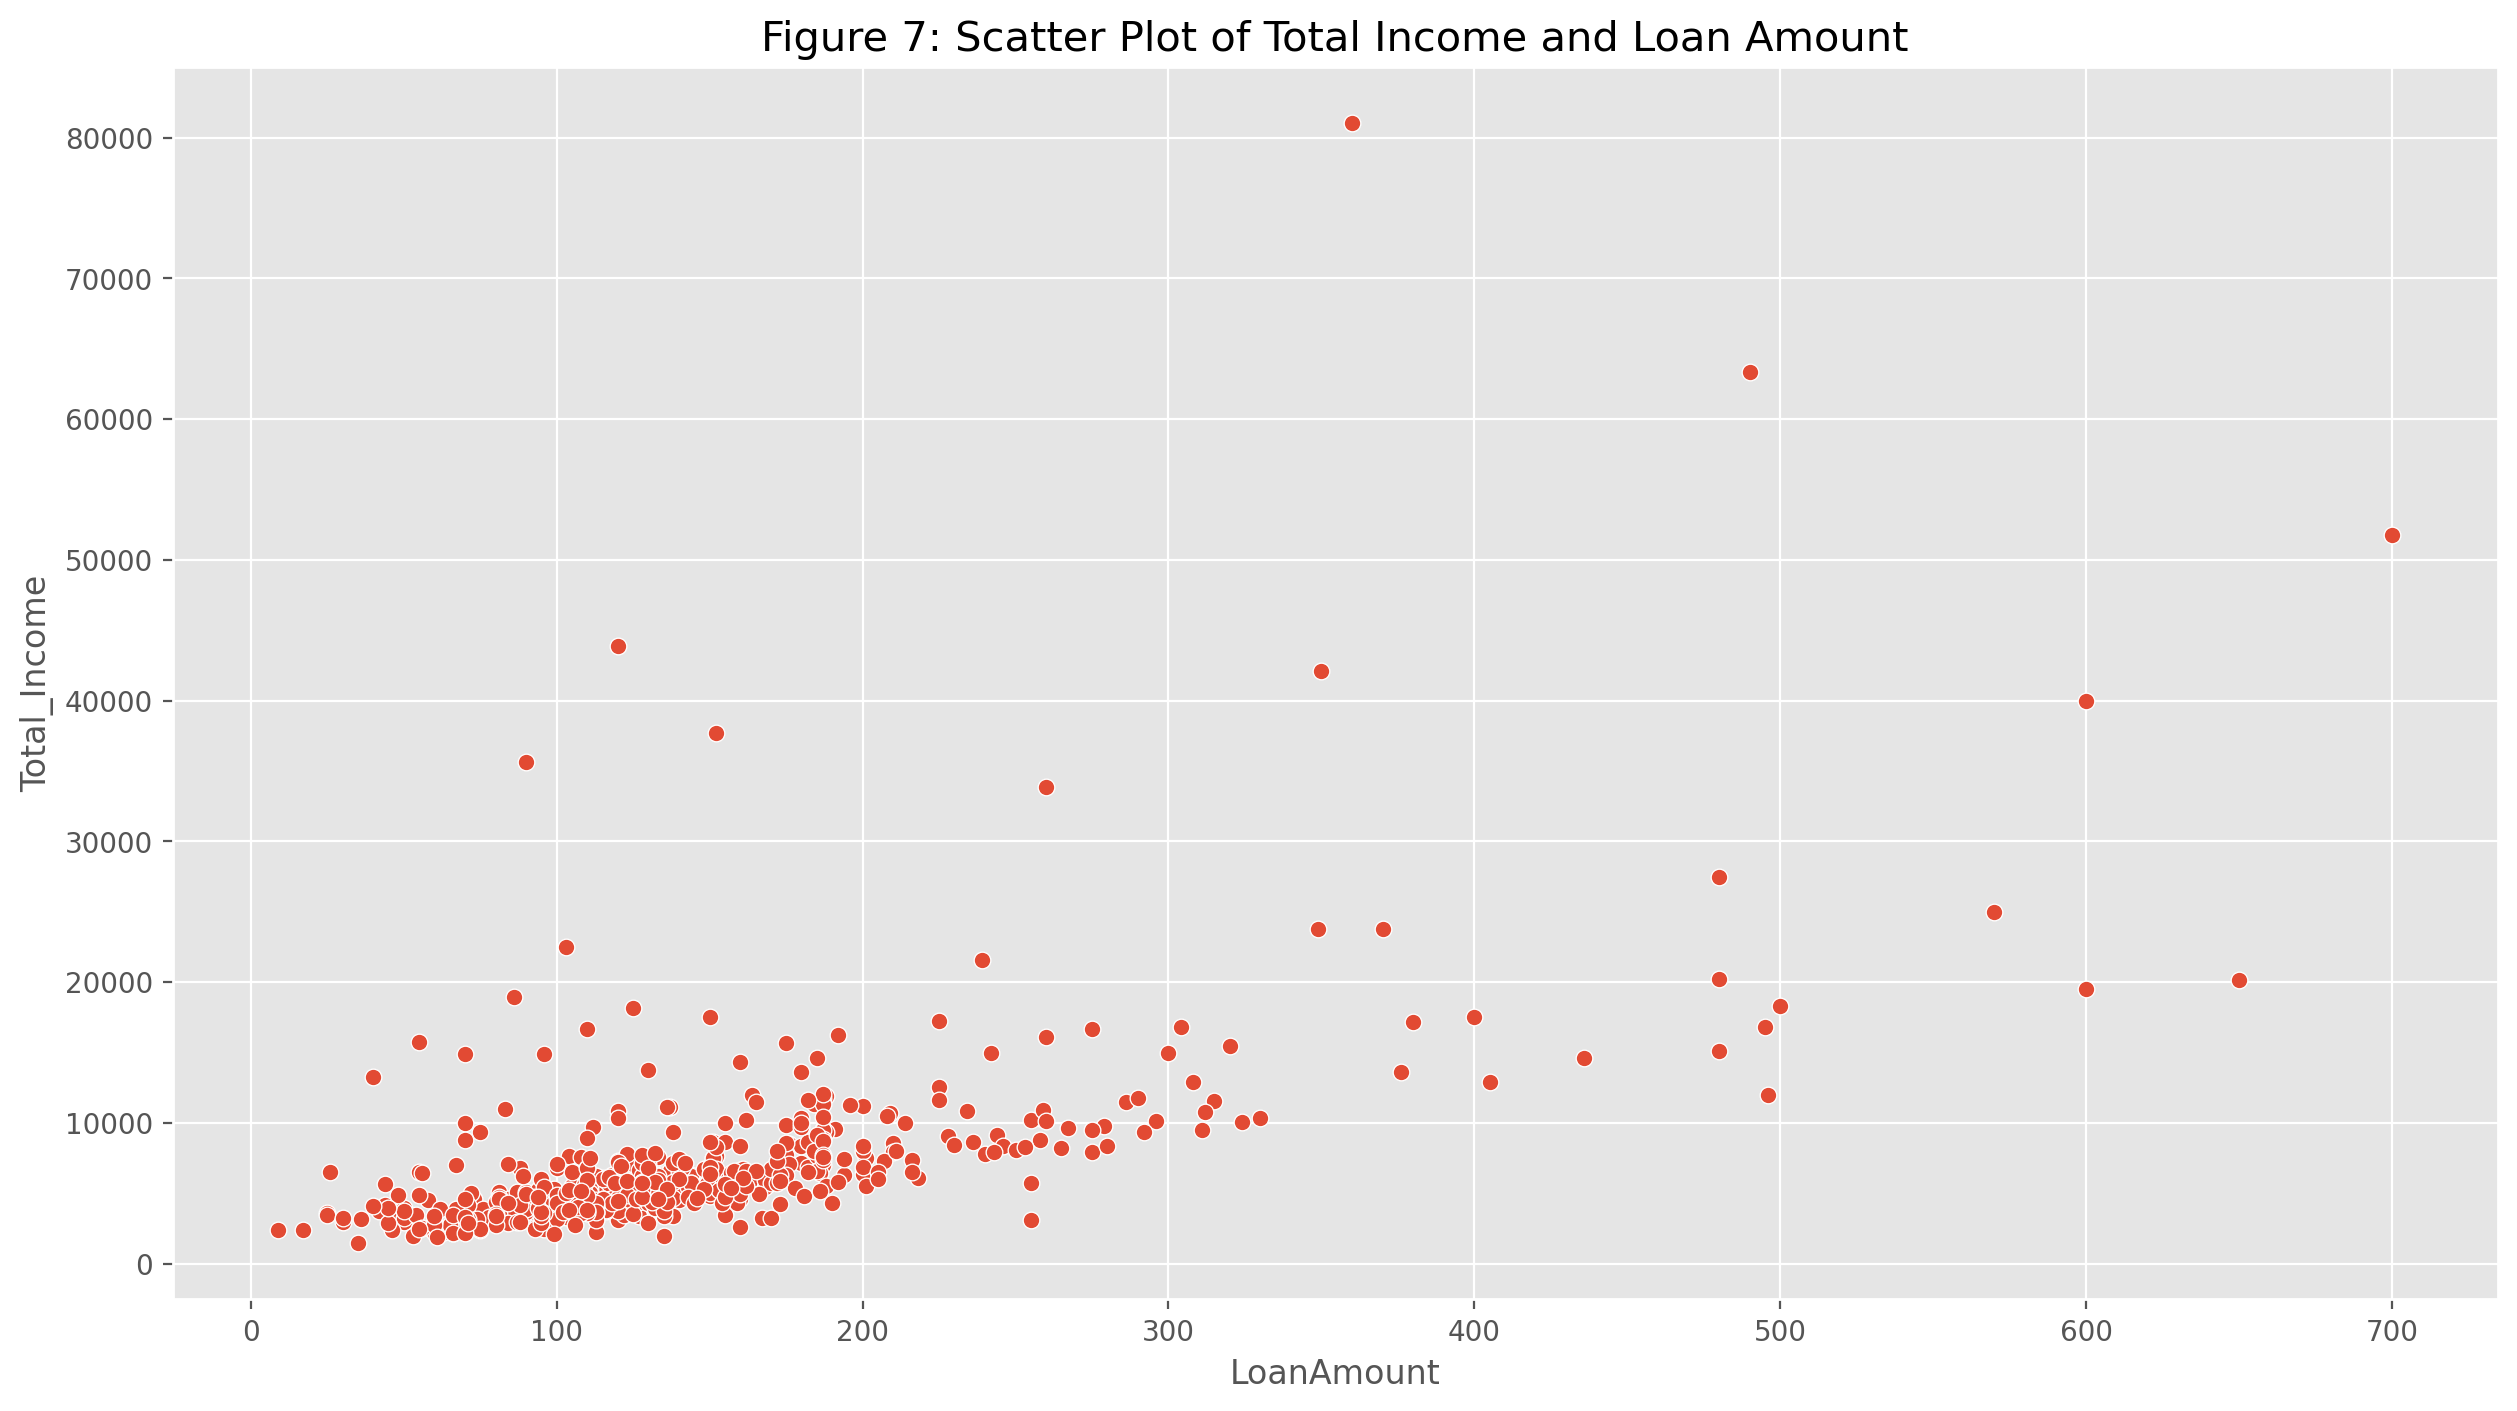

In [29]:
# Figure 7: Scatter Plot of Total Income and Loan Amount
plt.figure(figsize = (15,8))
sns.scatterplot(x=df['LoanAmount'], y=df['Total_Income']);
plt.title('Figure 7: Scatter Plot of Total Income and Loan Amount', fontsize = 15)
plt.show();

The scatterplot of Total income and Loan amount shows the relationship between the two features. From the scatterplot, it can be seen that the two features are positively related. This implies that as total income increases, the loan amount that they require will also increase. Furthermore, the scatterplot reveals that there are many outliers in it. This is due to the two features having many outliers within the dataset which results in the outliers shown in the scatterplot.

Text(0.5, 1.0, 'Figure 8: Countplot of Loan Status and Credit History')

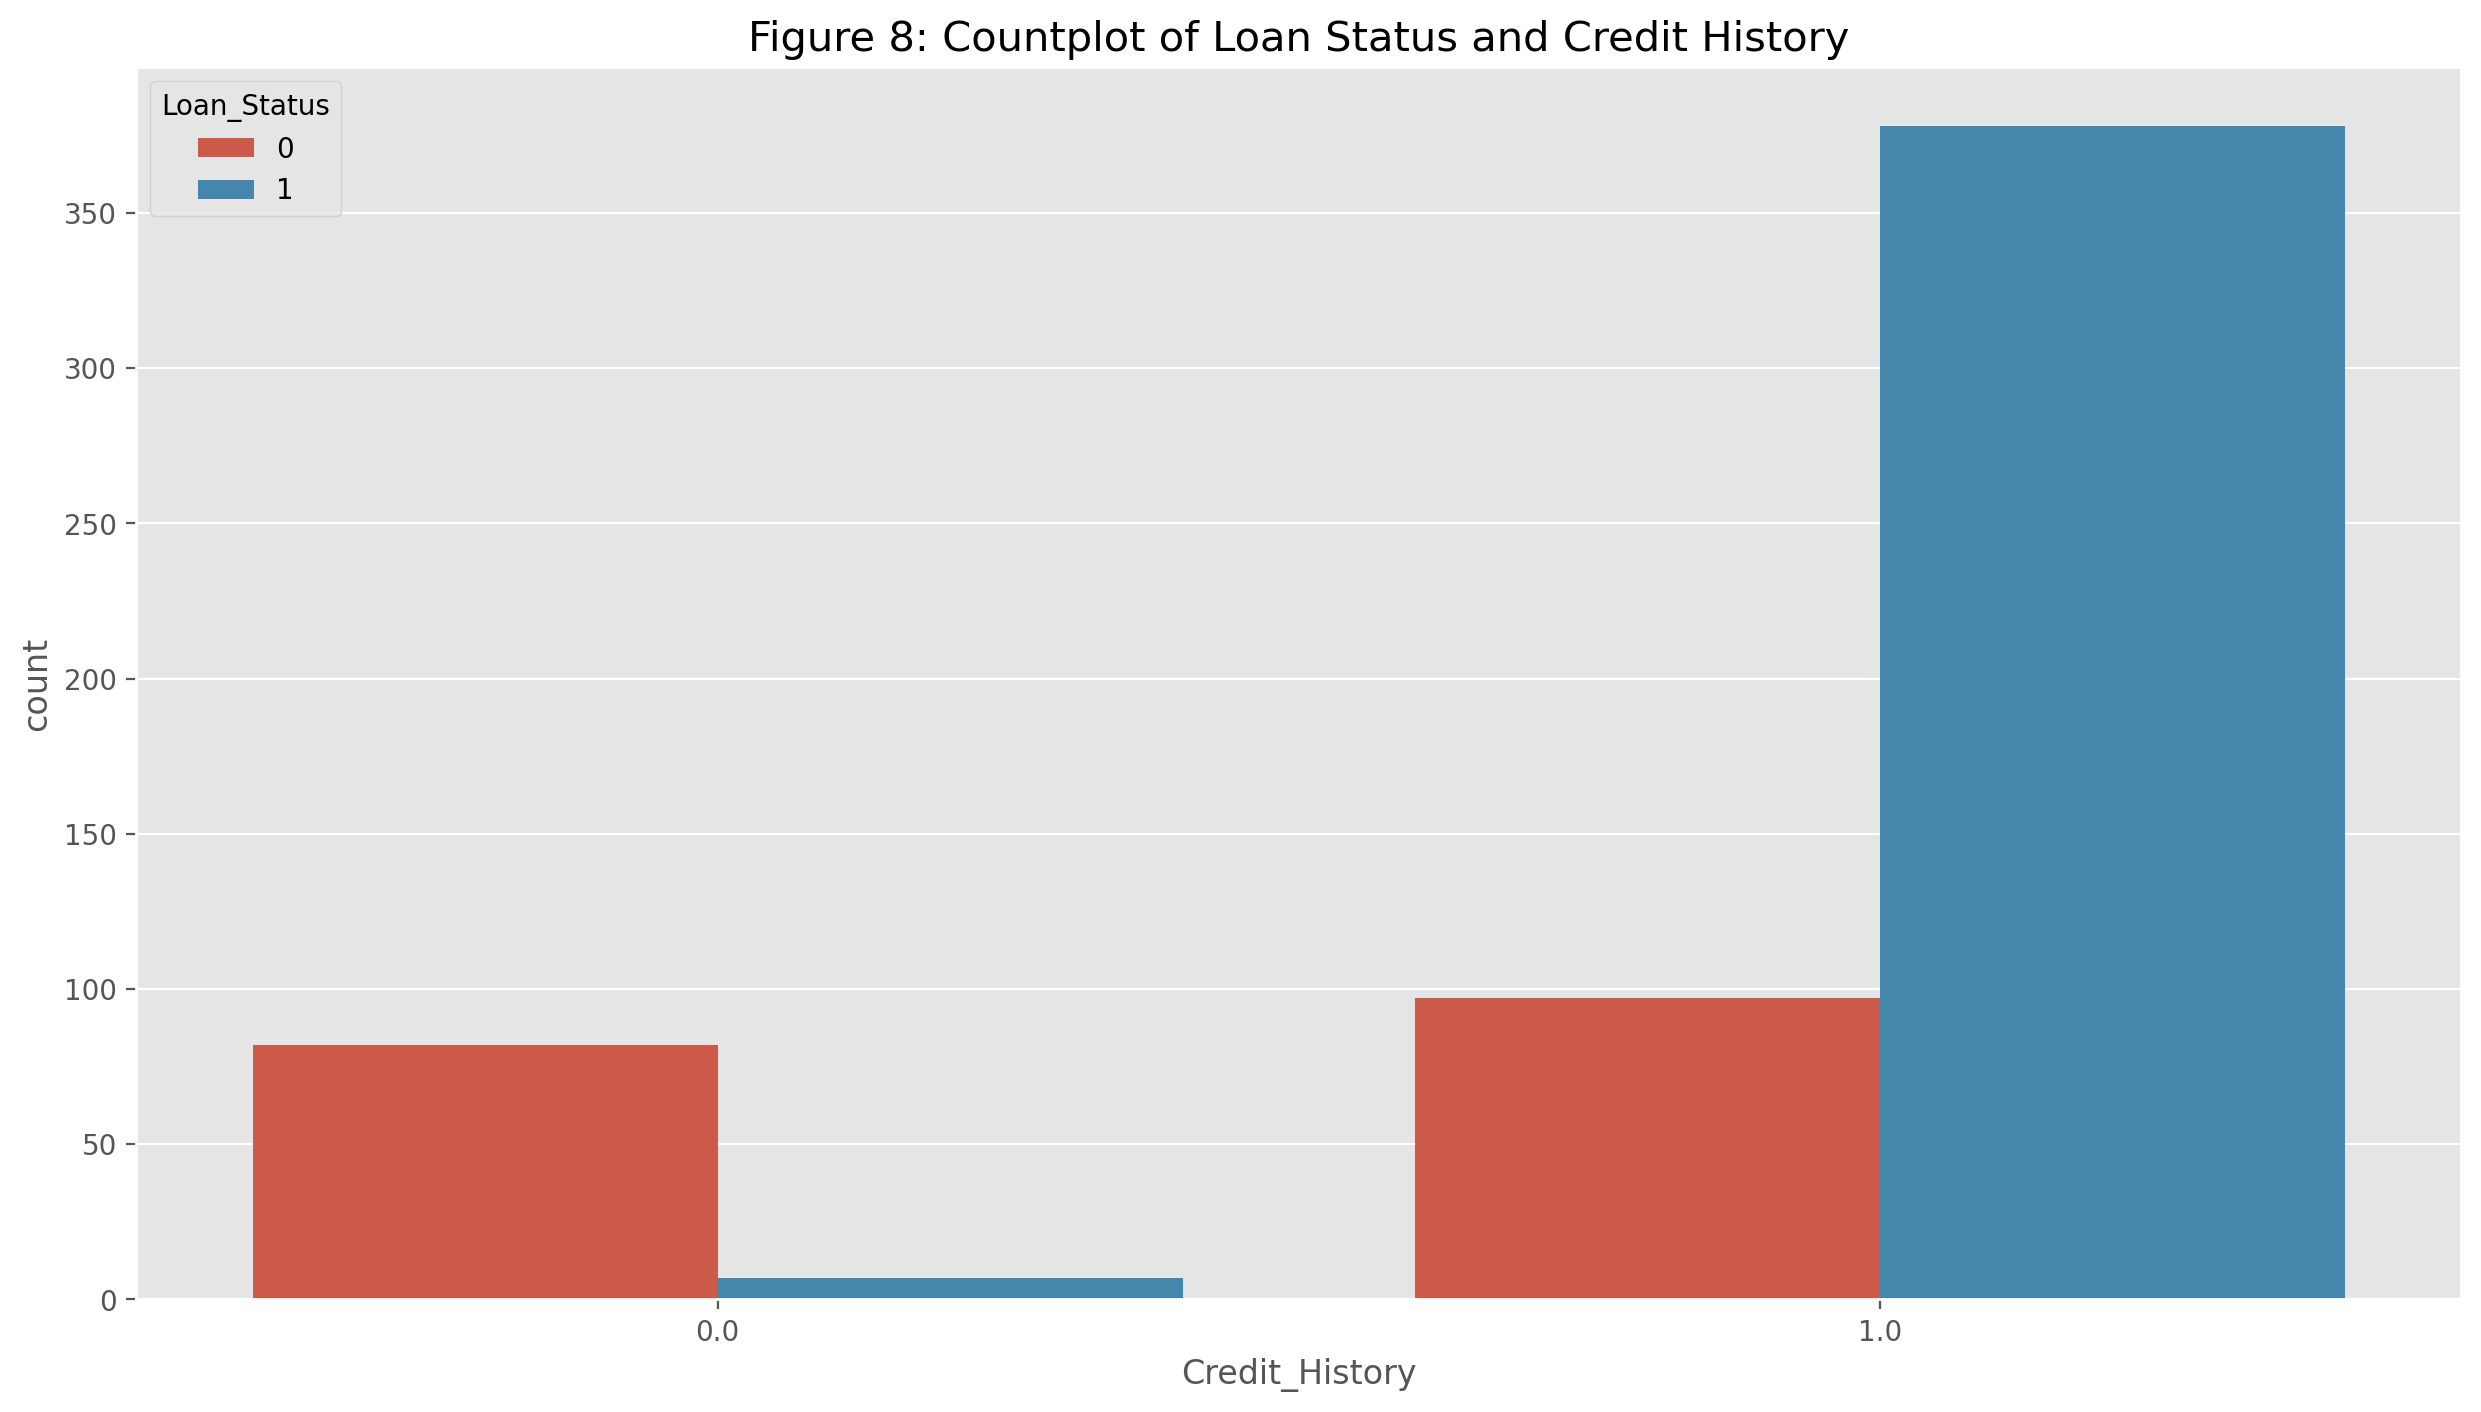

In [30]:
# Figure 8: Countplot of Loan Status and Credit History
plt.figure(figsize = (15,8))
fig_4 = sns.countplot(df, x ='Credit_History', hue ='Loan_Status')
plt.title('Figure 8: Countplot of Loan Status and Credit History', fontsize = 15)

The bar plot above shows the count of loan status approval based on their credit history. According to the plot above, it can be seen that those with credit history have a greater amount with loan approval compared to those who do not have credit history. This implies that applicants with credit history will have a greater chance for their loan application to be approved than those who do not have credit history previously. Furthermore, those who do not have credit history have a greater chance for their loan application to be rejected. This can be seen from the total amount of loan being rejected with credit history 0 and very few of the applicants are accepted in credit history 0. Although it appears that fewer loans are rejected (loan status 0) for credit history 0 compared to those in credit history 1, this is primarily due to the differing proportions between credit history 0 and 1 which is also depicted in figure 4 pie chart.

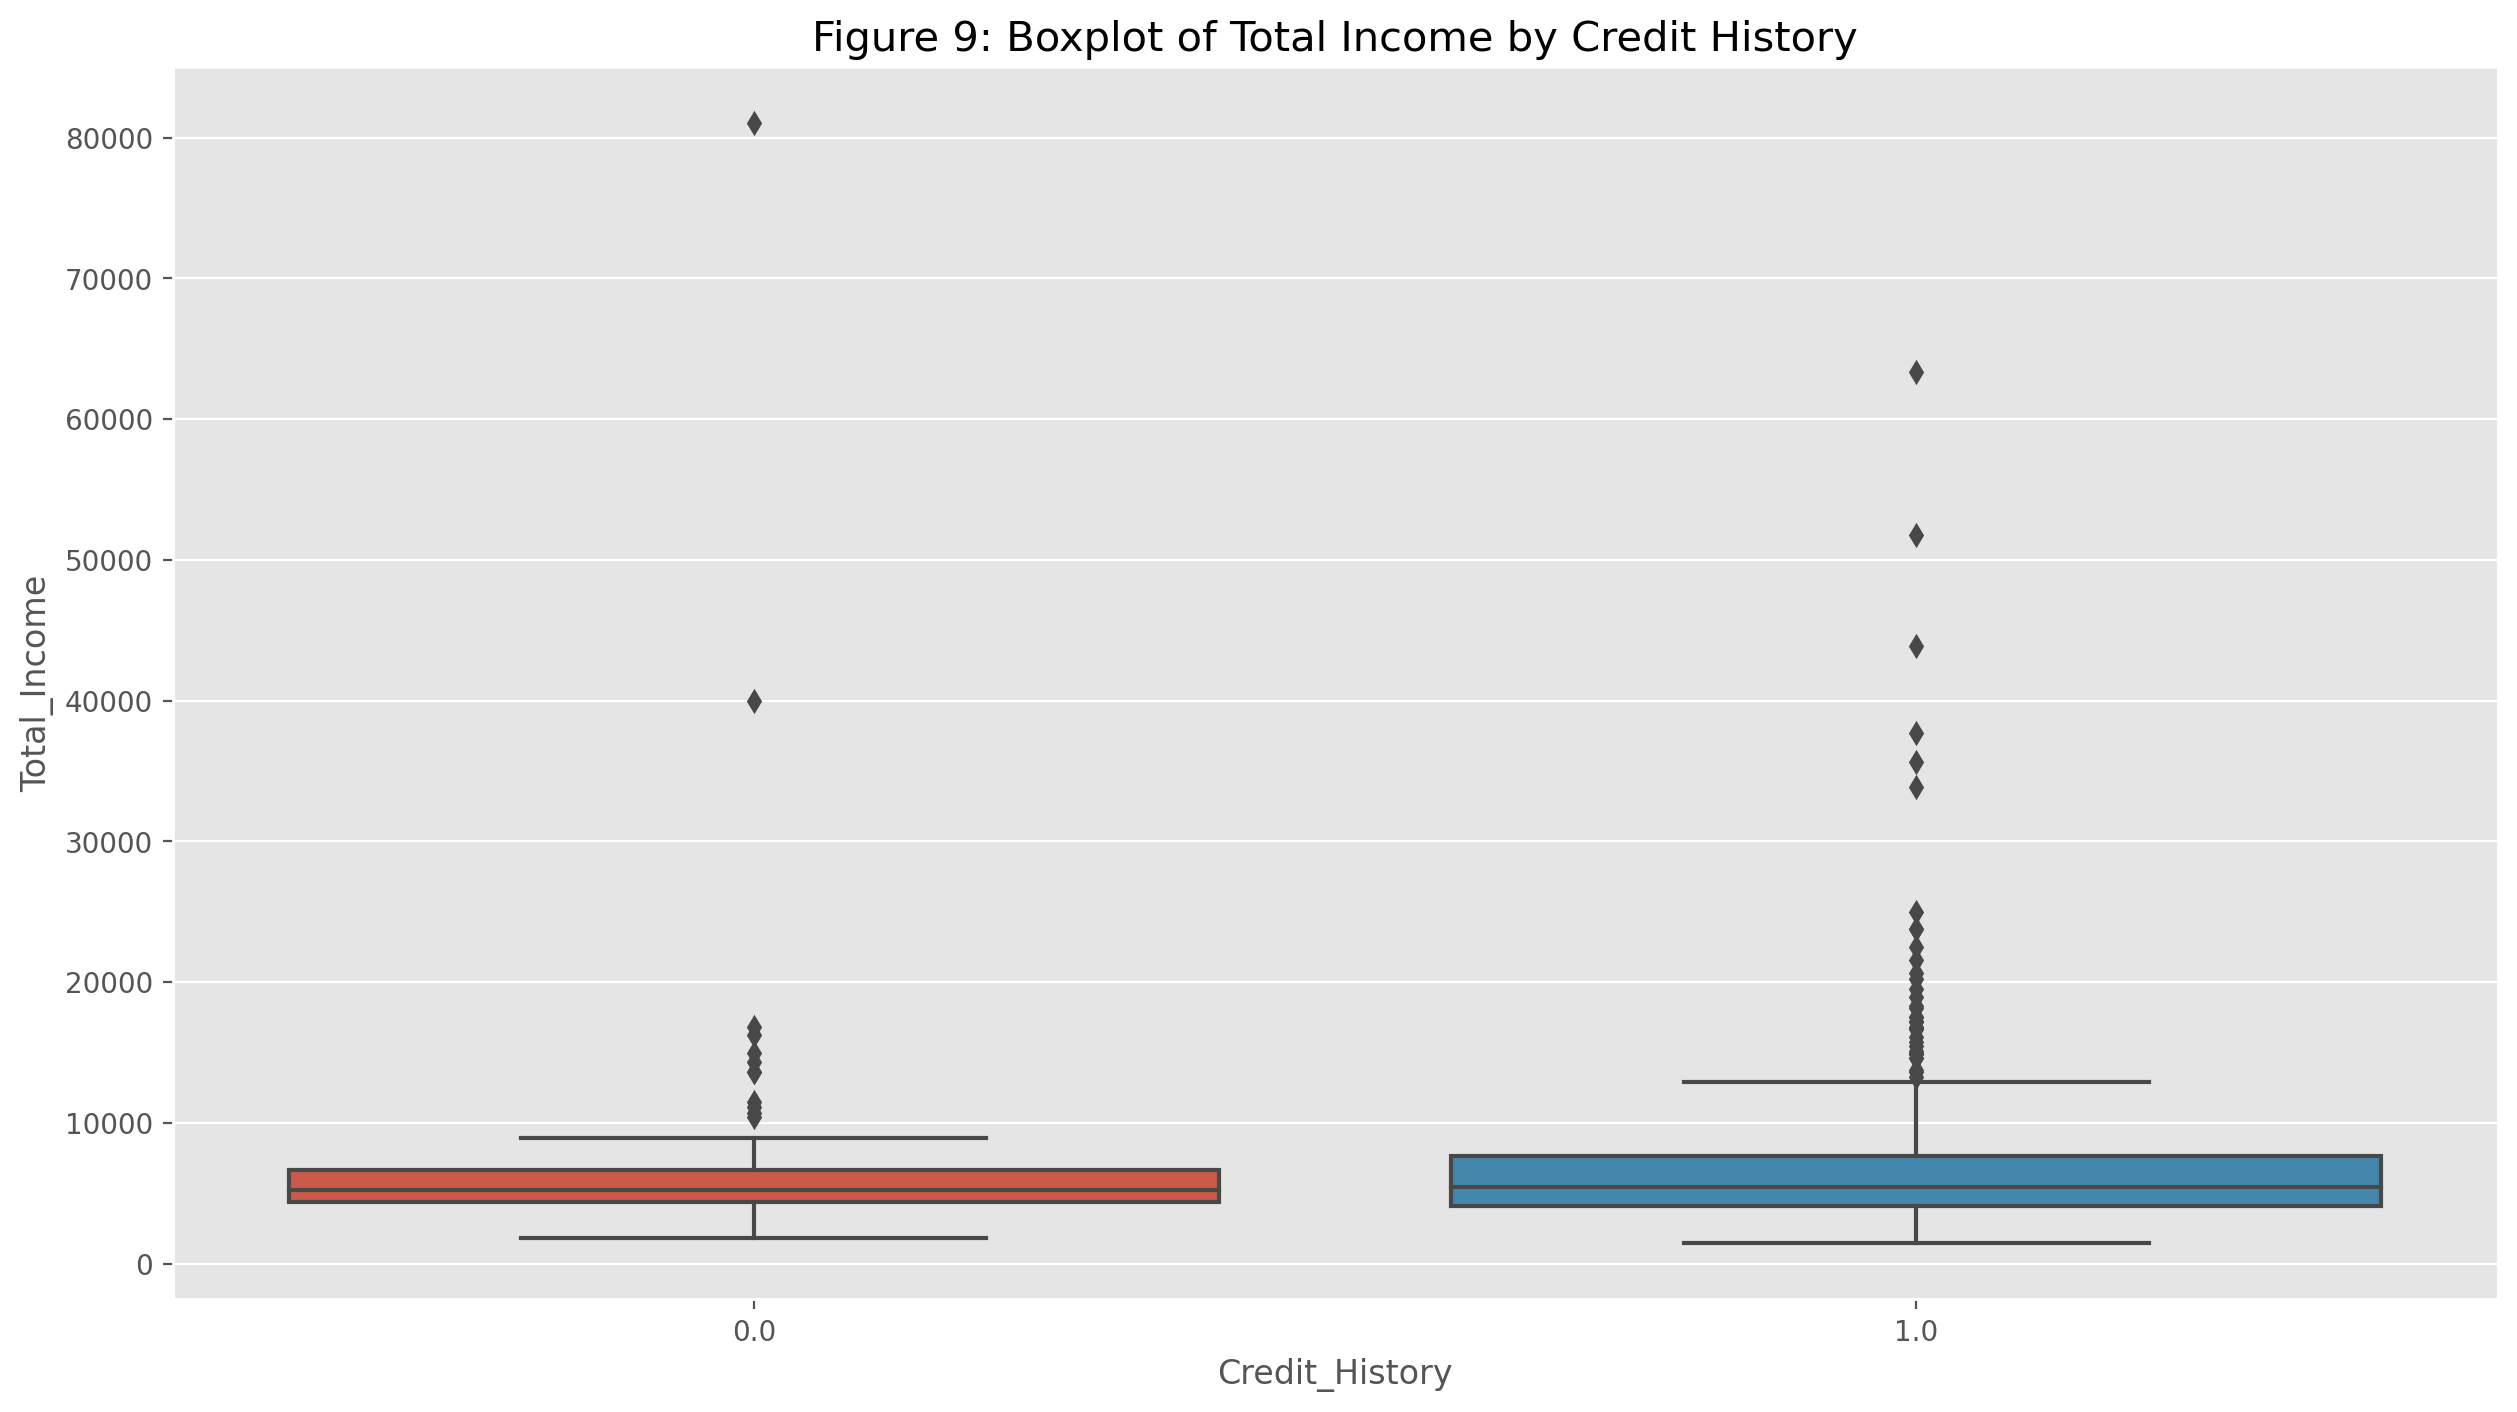

In [31]:
# Figure 9: Boxplot of Total Income by Credit History
plt.figure(figsize = (15,8))
sns.boxplot(x=df['Credit_History'], y=df['Total_Income']);
plt.title('Figure 9: Boxplot of Total Income by Credit History', fontsize = 15)
plt.show();

The above boxplot shows the distribution of Total Income based on Credit History. The box plot depicts that those with credit history (Credit History = 1) have a higher median compared to Total Income of applicants without Credit History (Credit History = 0). This implies that applicants that have a credit history may have a higher Total Income than those who do not have credit history. Moreover, it appears that the boxplot of credit history 1 has more outliers compared to the boxplot of credit history 0. The range of credit history 1 also seems to be higher due to the longer upper whisker of the boxplot. This indicates that applicants that have credit history have a greater variability in their Total Income compared to applicants that do not have credit history. In addition, both boxplots display that the Total Income distribution for those with or without Credit History are likely to skew to the right due to the outliers that predominantly present only in the upper whisker of the boxplot while the lower whisker does not have any outliers at all.

### Three Variable Visualisation

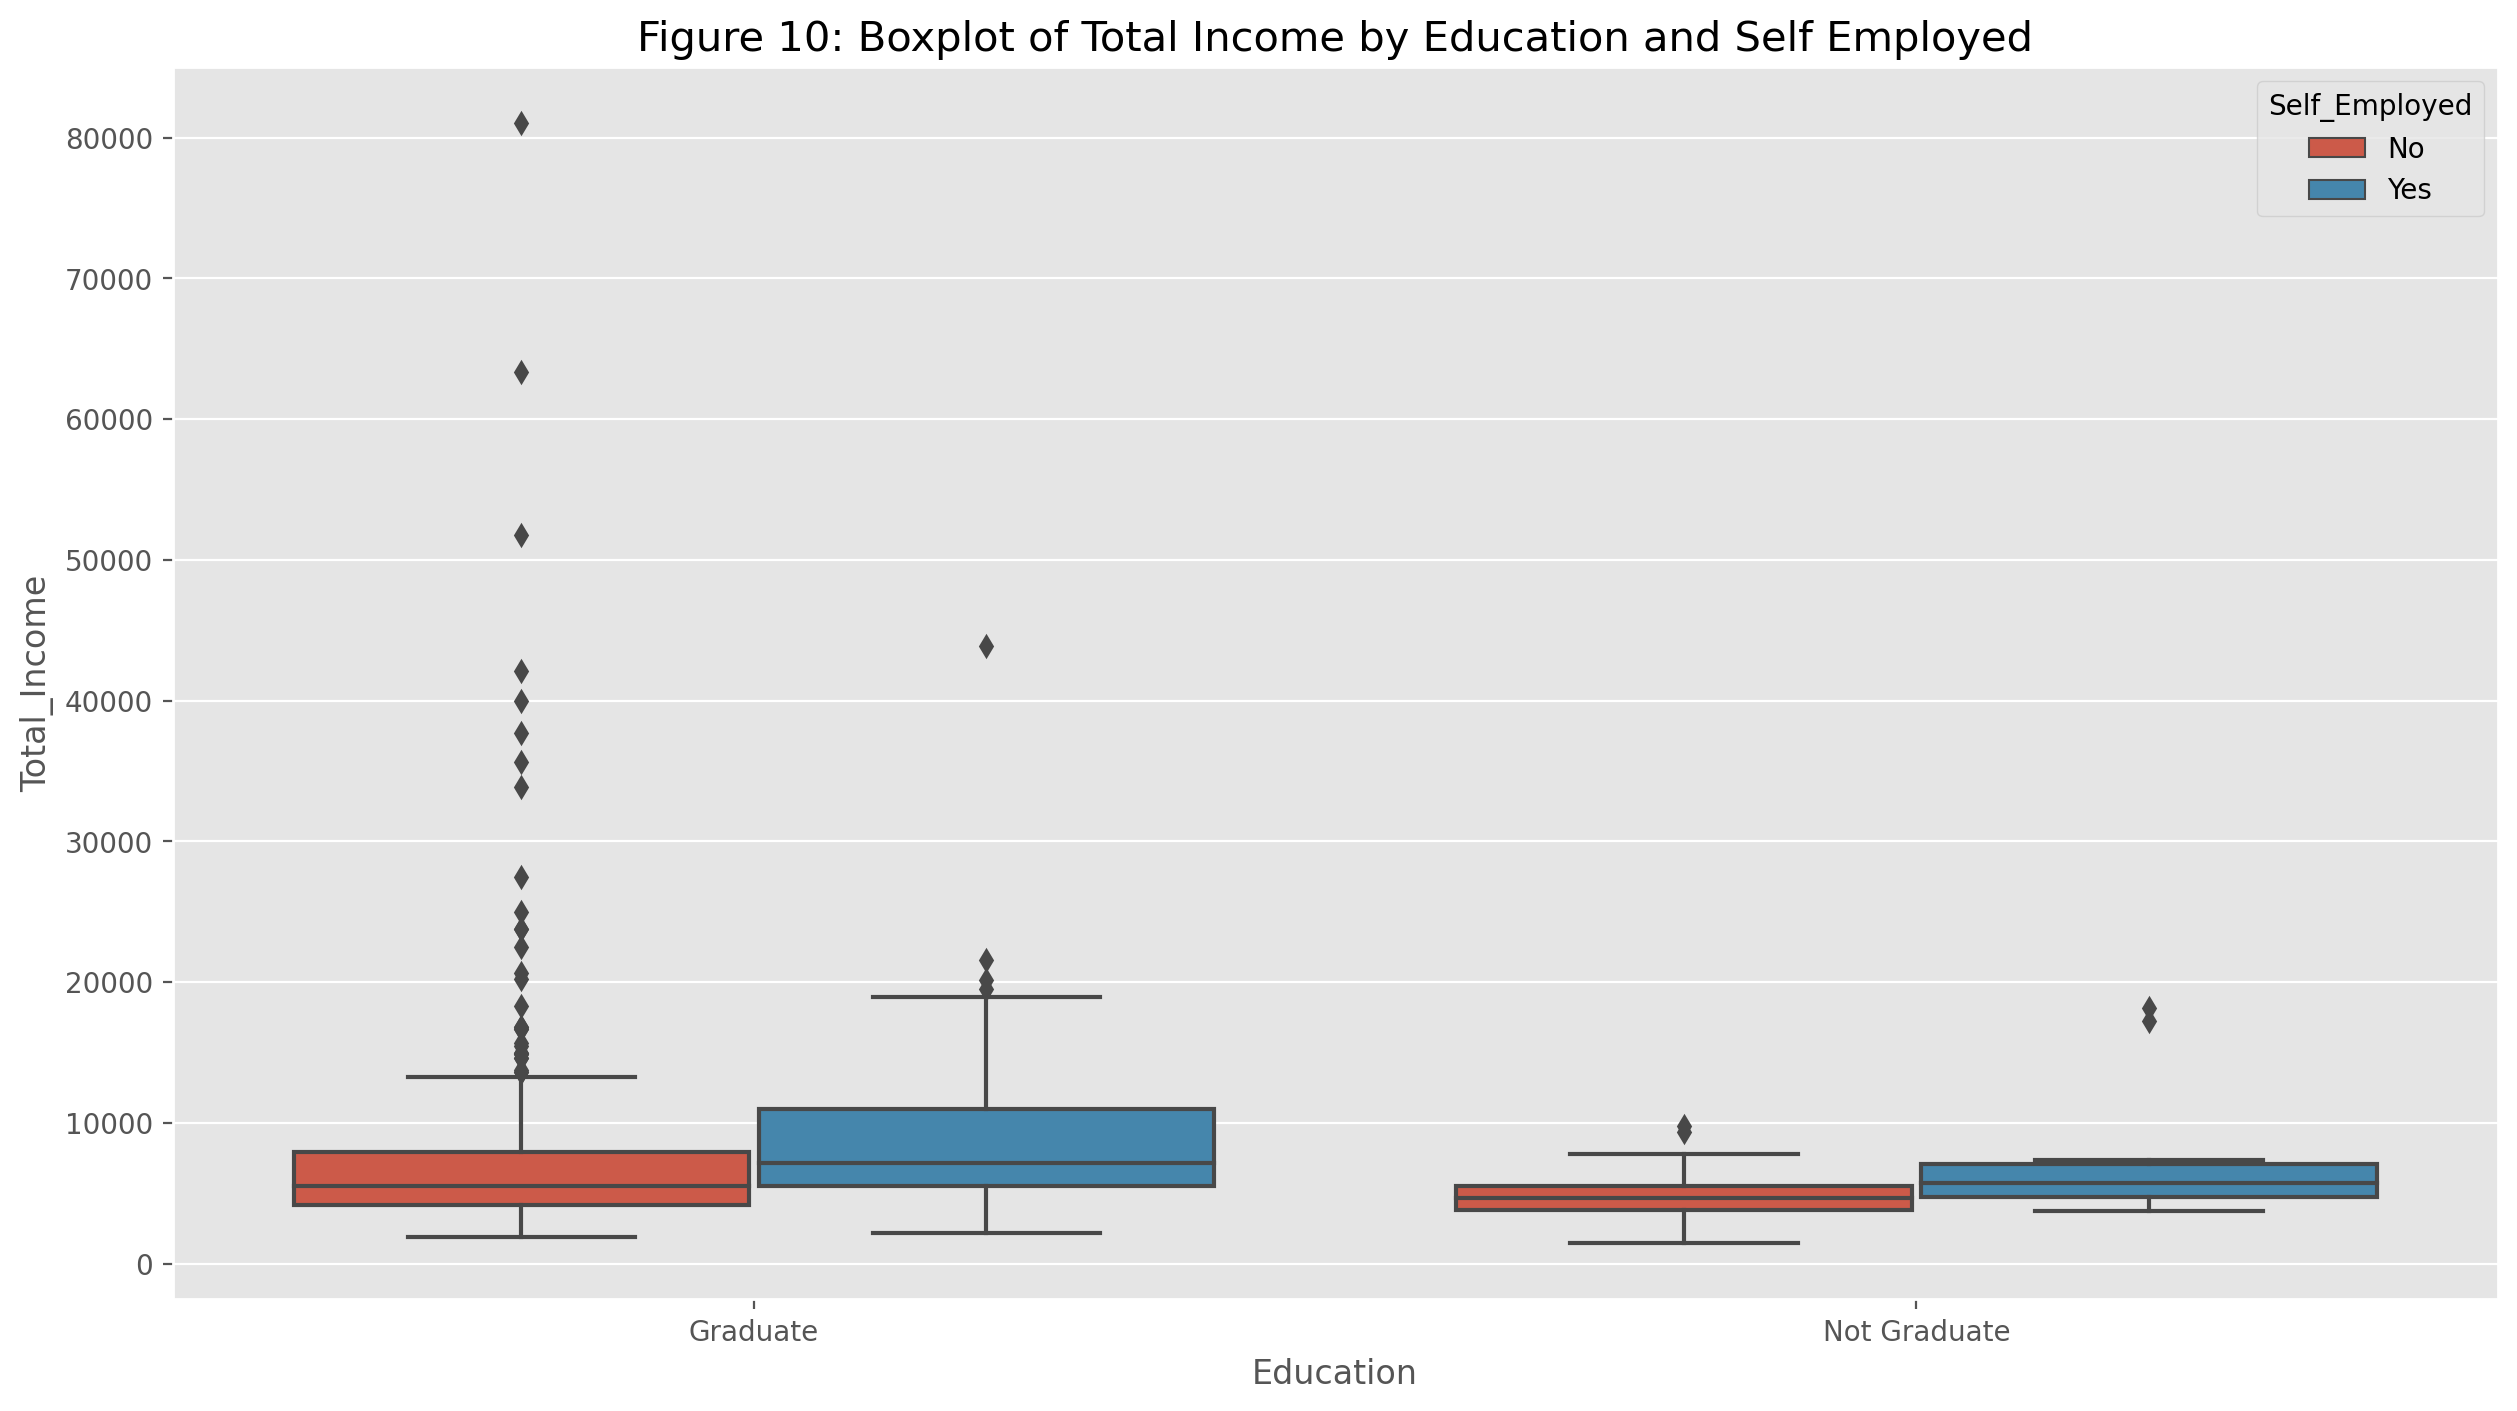

In [32]:
# Figure 10: Boxplot of Total Income by Education and Self Employed
plt.figure(figsize = (15,8))
sns.boxplot(x=df['Education'], y=df['Total_Income'],
            hue = df['Self_Employed'])
plt.title('Figure 10: Boxplot of Total Income by Education and Self Employed', fontsize = 15)
plt.show();

The box plot of Total Income by Education and Self Employed shows that applicants who are graduated are normally have higher total income than those applicants who are not graduated due to the higher maximum values and higher median for total income features compared to those are not graduated. Apart form that, for the applicants who are graduated, those who are self employed have higher median value, higher maximum value, higher minimum value, and spread range for total income for total income that compared to applicants are not self employed, for the applicants who are not graduated, although those who are self employed have higher median value, the range for total income is smaller than those applicants who are not self employed. Therefore the applicants who are graduated and self employed have a greater chance to get higher total income, and the applicants who are graduated and not self employed have higher total income in general than those are graduated and self employed due to the higher sequence of outliers. Furthermore, the applicants who are not graduated and not self employed have a greater chance to get higher total income than those are not graduated and self employed.

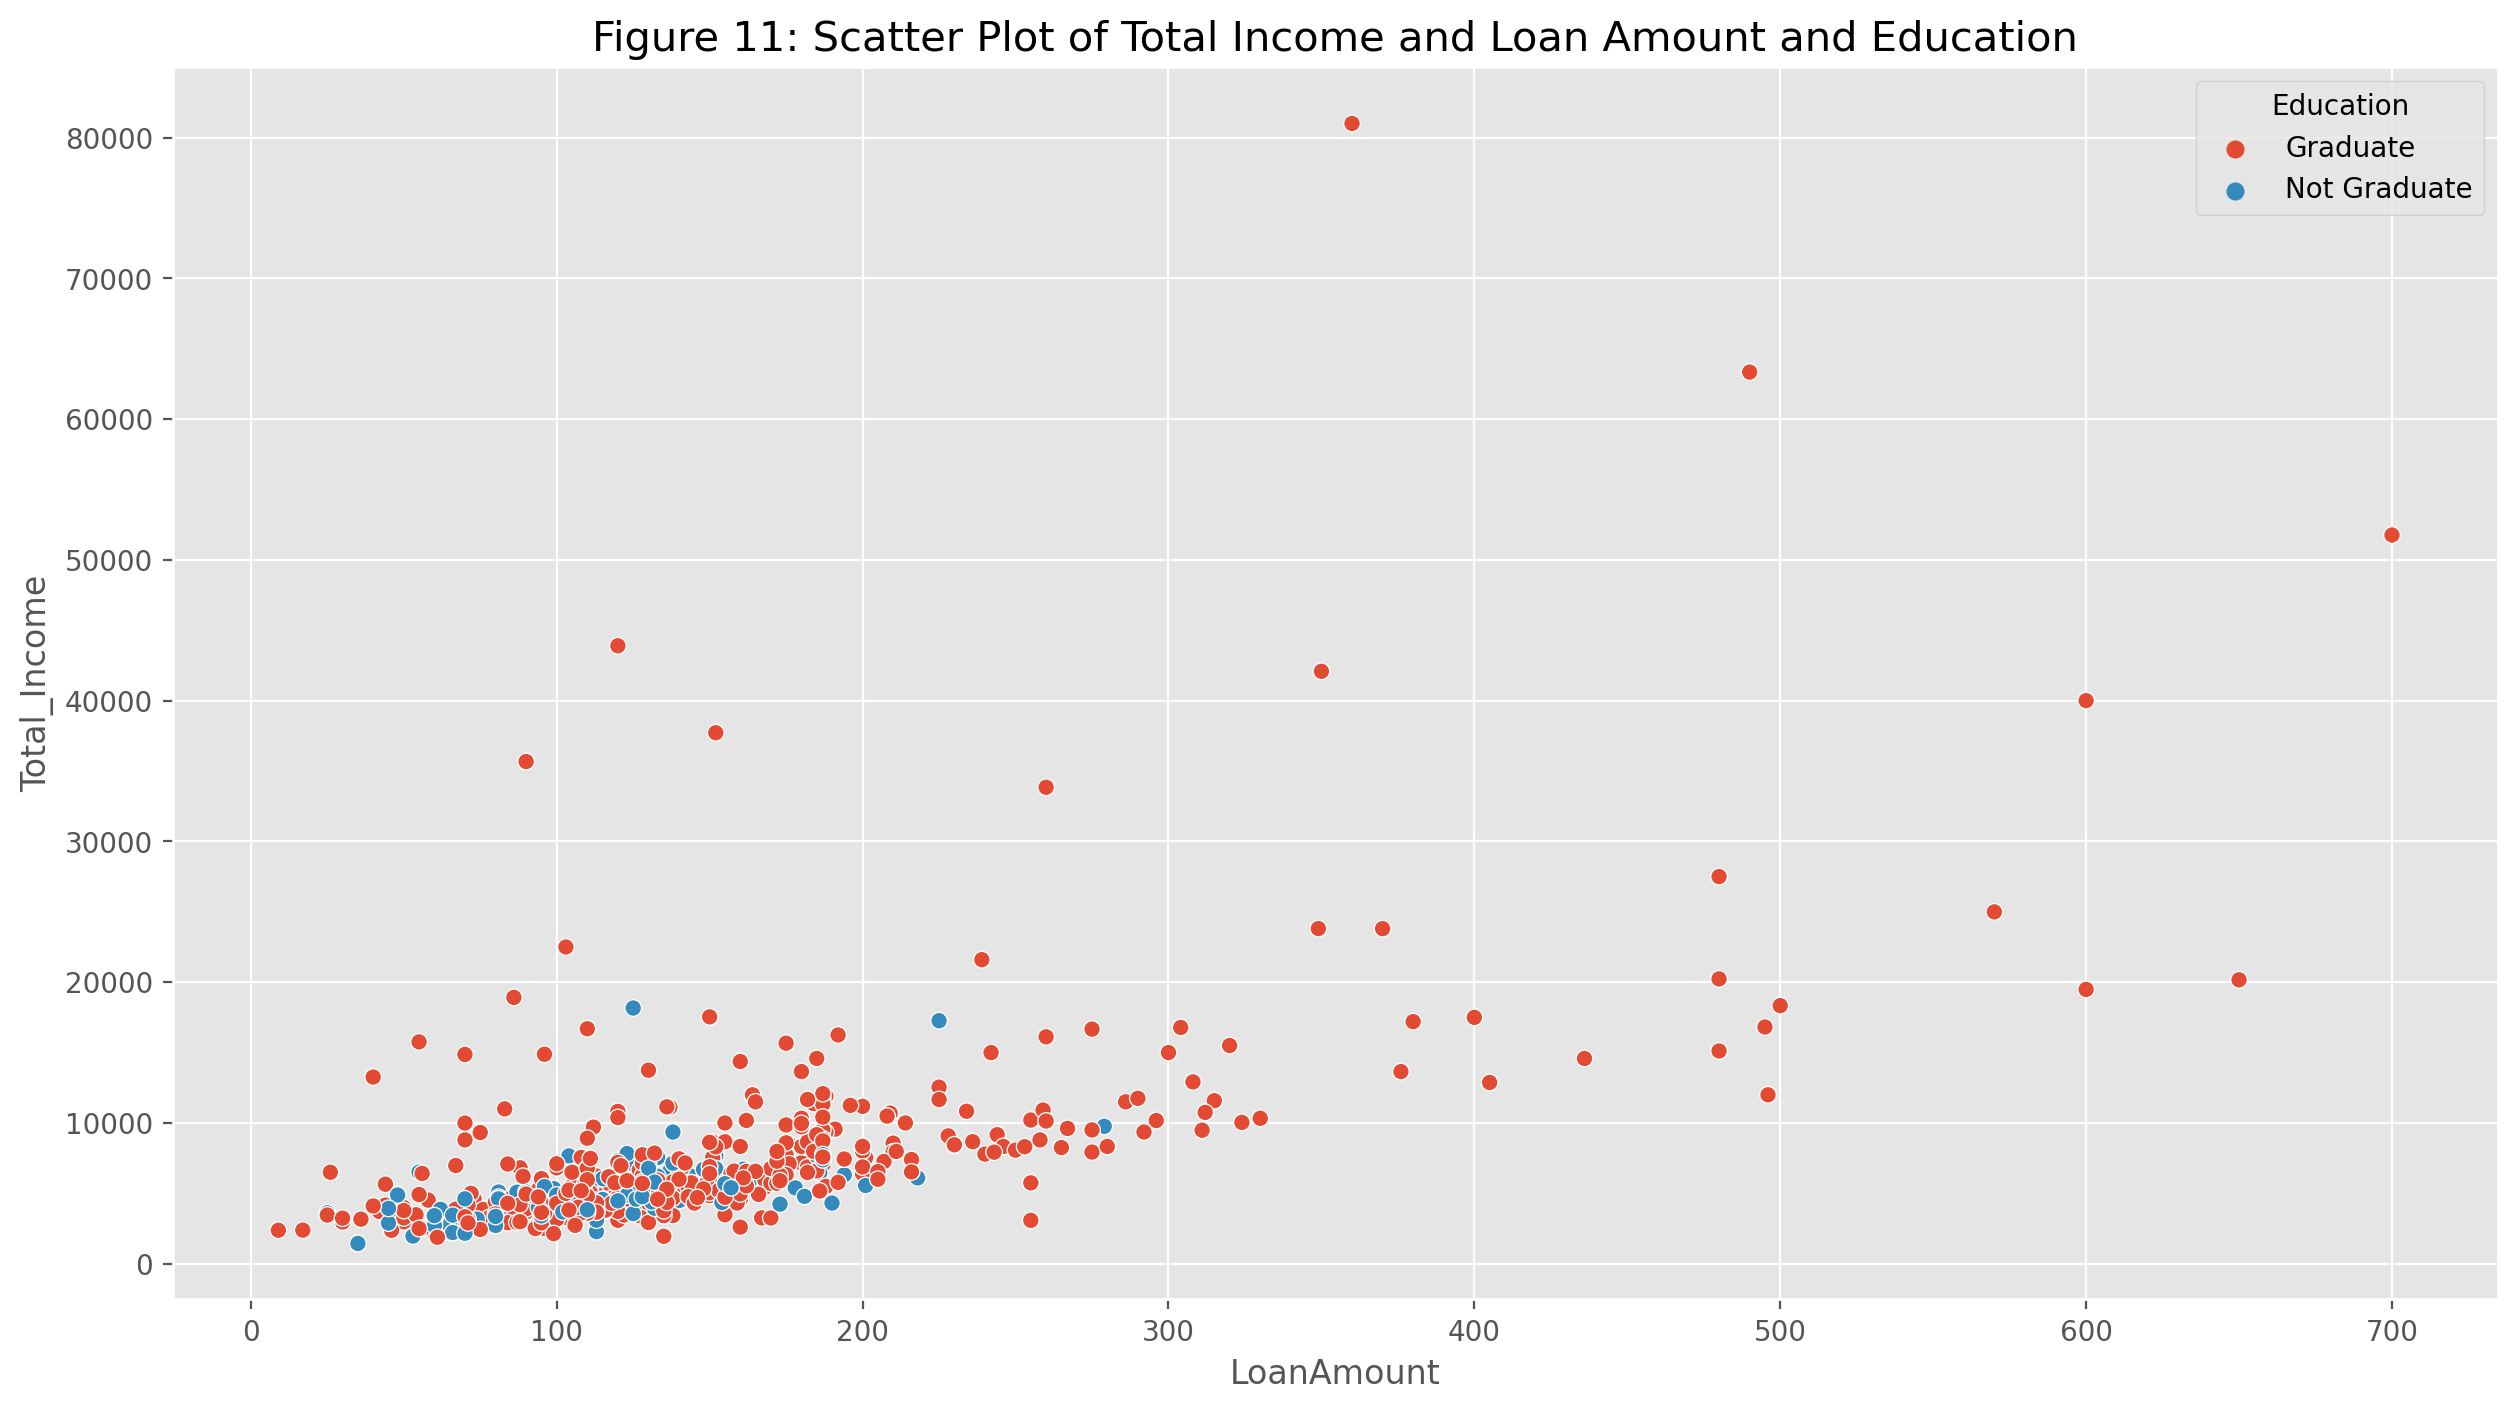

In [33]:
# Figure 11: Scatterplot of Total Income by Loan Amount and Credit History
plt.figure(figsize = (15,8))
sns.scatterplot(x=df['LoanAmount'], y=df['Total_Income'],
            hue = df['Education'])
plt.title('Figure 11: Scatter Plot of Total Income and Loan Amount and Education', fontsize = 15)
plt.show();

The scatterplot of Total Income and Loan Amount and Education suggests that the total income of applicants and loan amount they required forms an upward straight line which implies total income and loan amount are positively related. The plot represents that the applicants who are graduated have higher total income and loan amount than those are not graduated as it can be seen that more graduate applicants are located in the higher end of teh total income. Furthermore, the scatterplot reveals that there is many outliers in it. This is due to the features Total Income and Loan Amount have many outliers within the dataset which results in the outliers shown in the scatterplot.

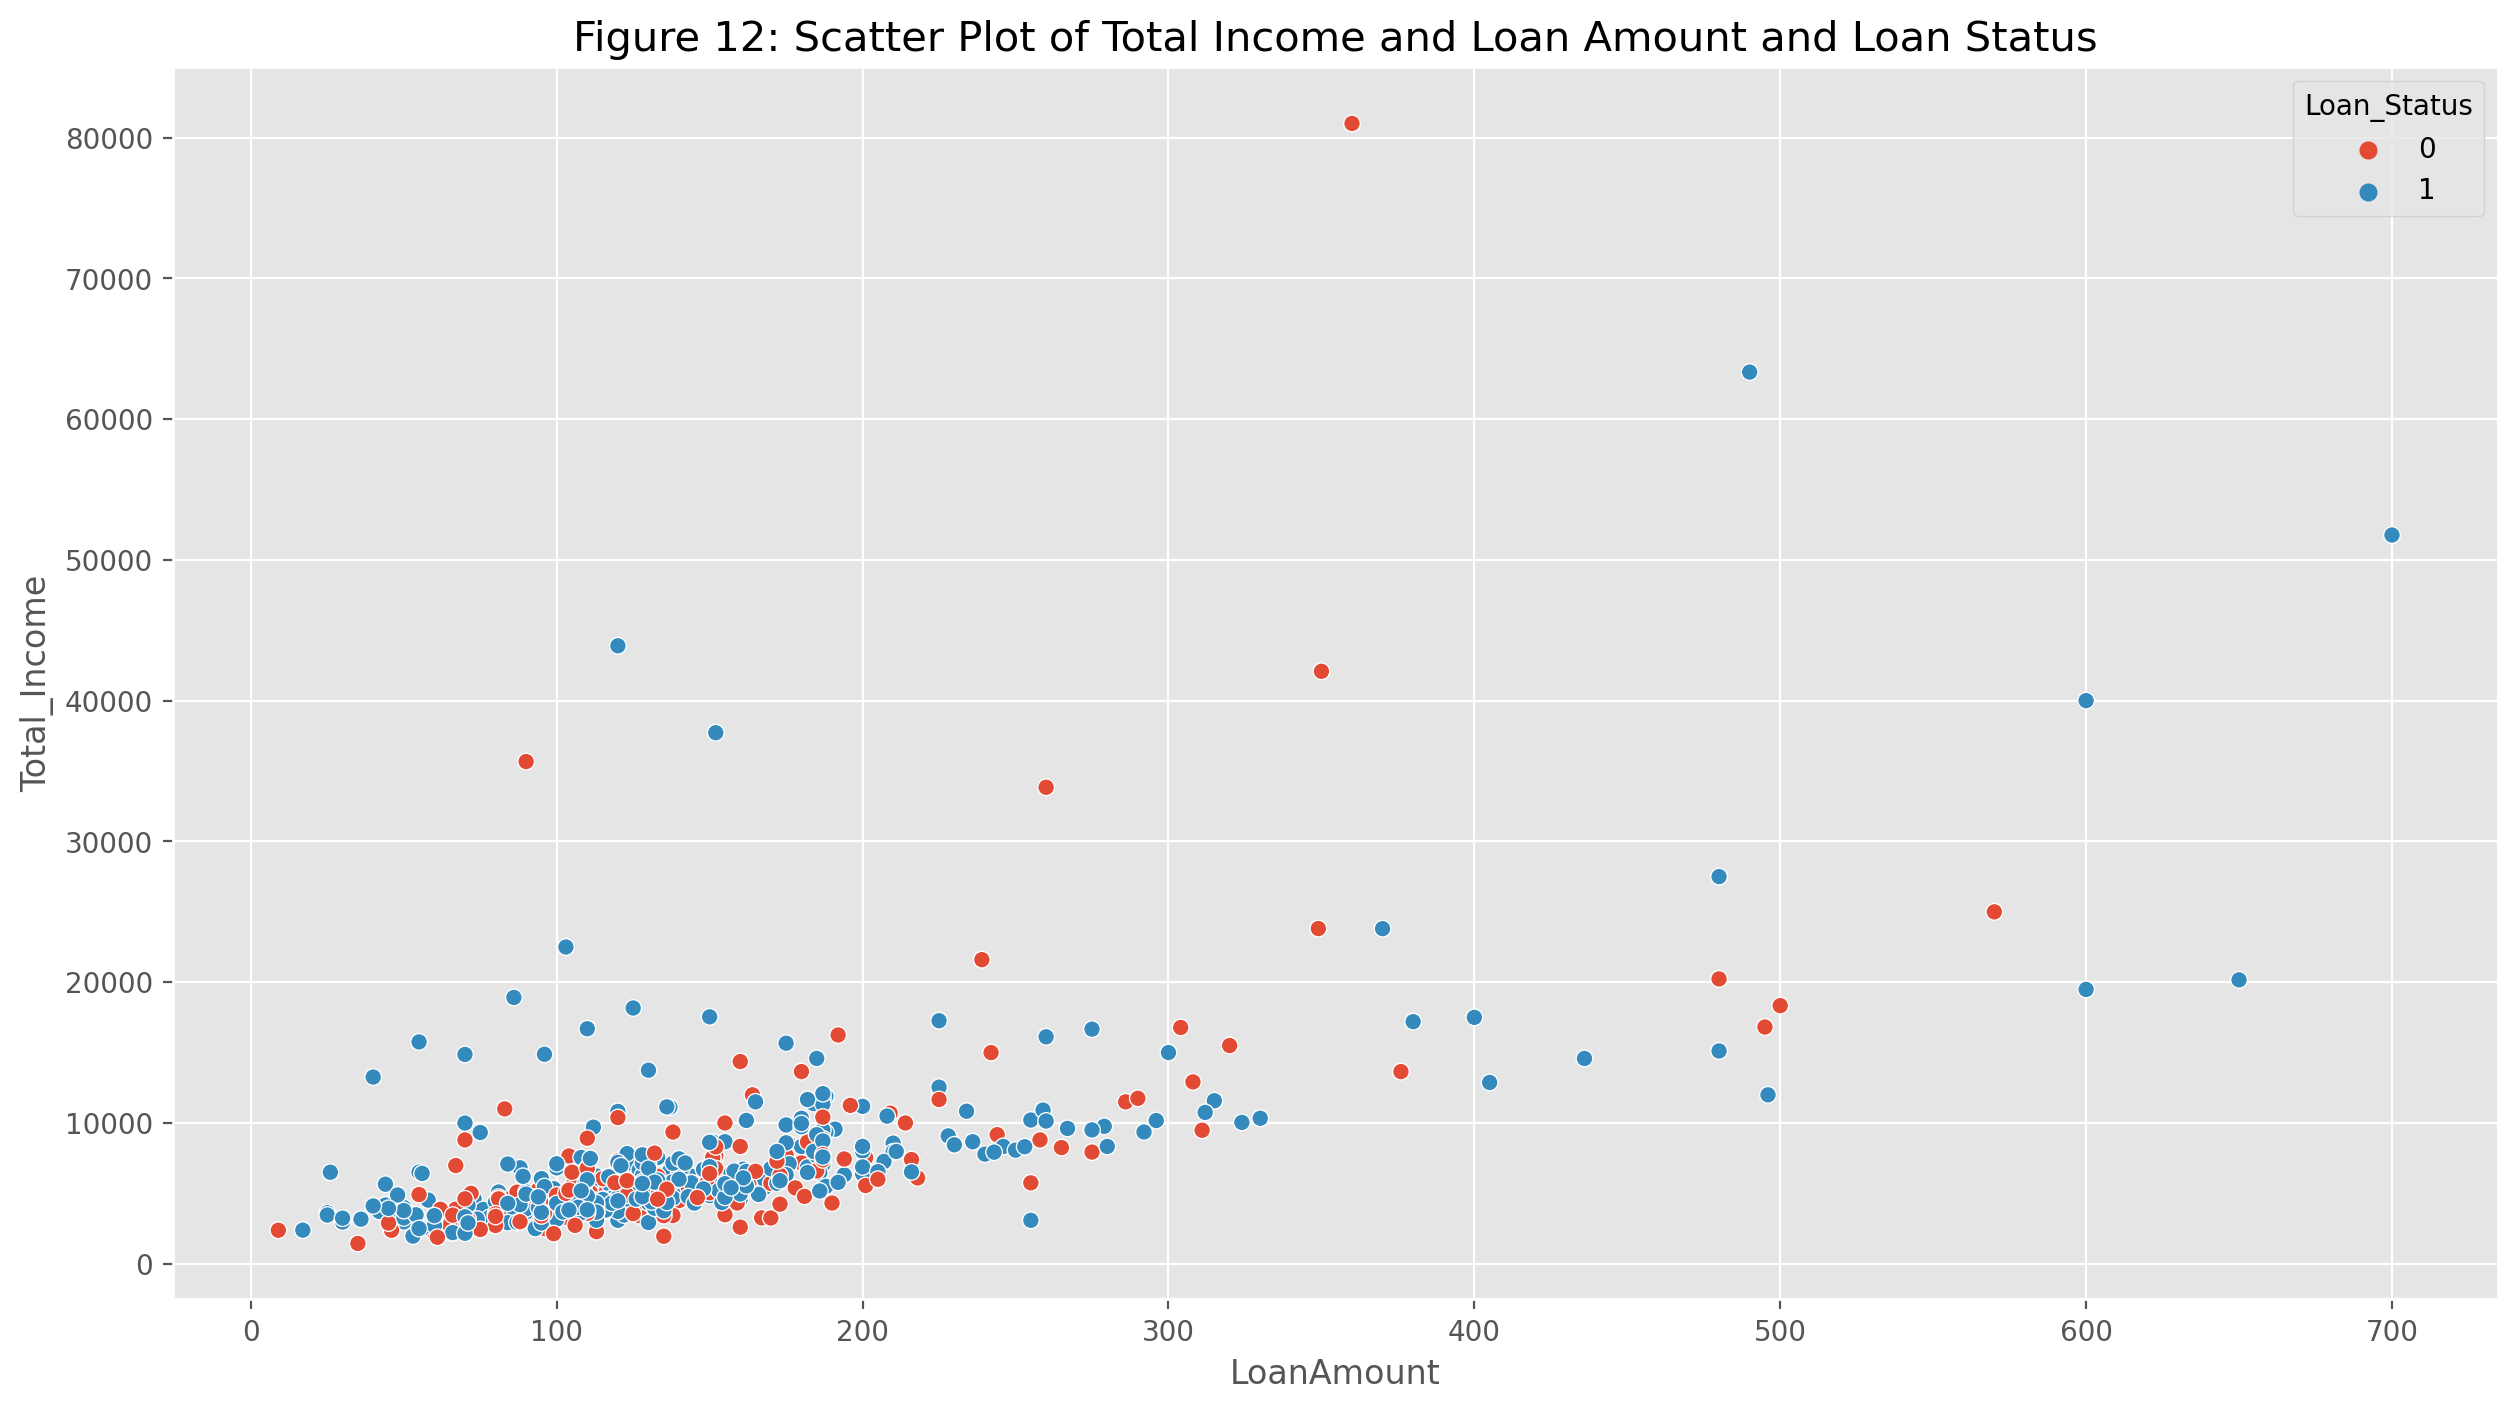

In [34]:
#figure 12: Scatterplot of Total Income by Loan Amount and Credit History
plt.figure(figsize = (15,8))
sns.scatterplot(x=df['LoanAmount'], y=df['Total_Income'],
            hue = df['Loan_Status'])
plt.title('Figure 12: Scatter Plot of Total Income and Loan Amount and Loan Status', fontsize = 15)
plt.show();

The scatterplot of total income, loan amount and credit history shows the relationship between these three features. From the scatterplot, the same pattern of positive relationship between the loan amount and total income shown in Figure 7 can be observed. However, in this case, we added the target feature which is the loan status to the scatterplot. Overall, most data points are concentrated in the bottom left part of the scatterplot indicating that more individuals have a low total income and requested a lower loan amount. For those who have low total income and low loan amount requested, the proportions of those getting their loan approved and those who got rejected are similar. For those who have requested a higher loan amount, most of their loans get approved. It can also be seen that those who requested the loan amount of 350 got their loan request rejected. One of them that was rejected had the highest total income among all the observations. Therefore, the total income feature alone is unable to predict the loan status. There does not seem to be a clear pattern or cluster between the two groups of loan status indicating that the combination of these two features would not be a good predictor of loan status.

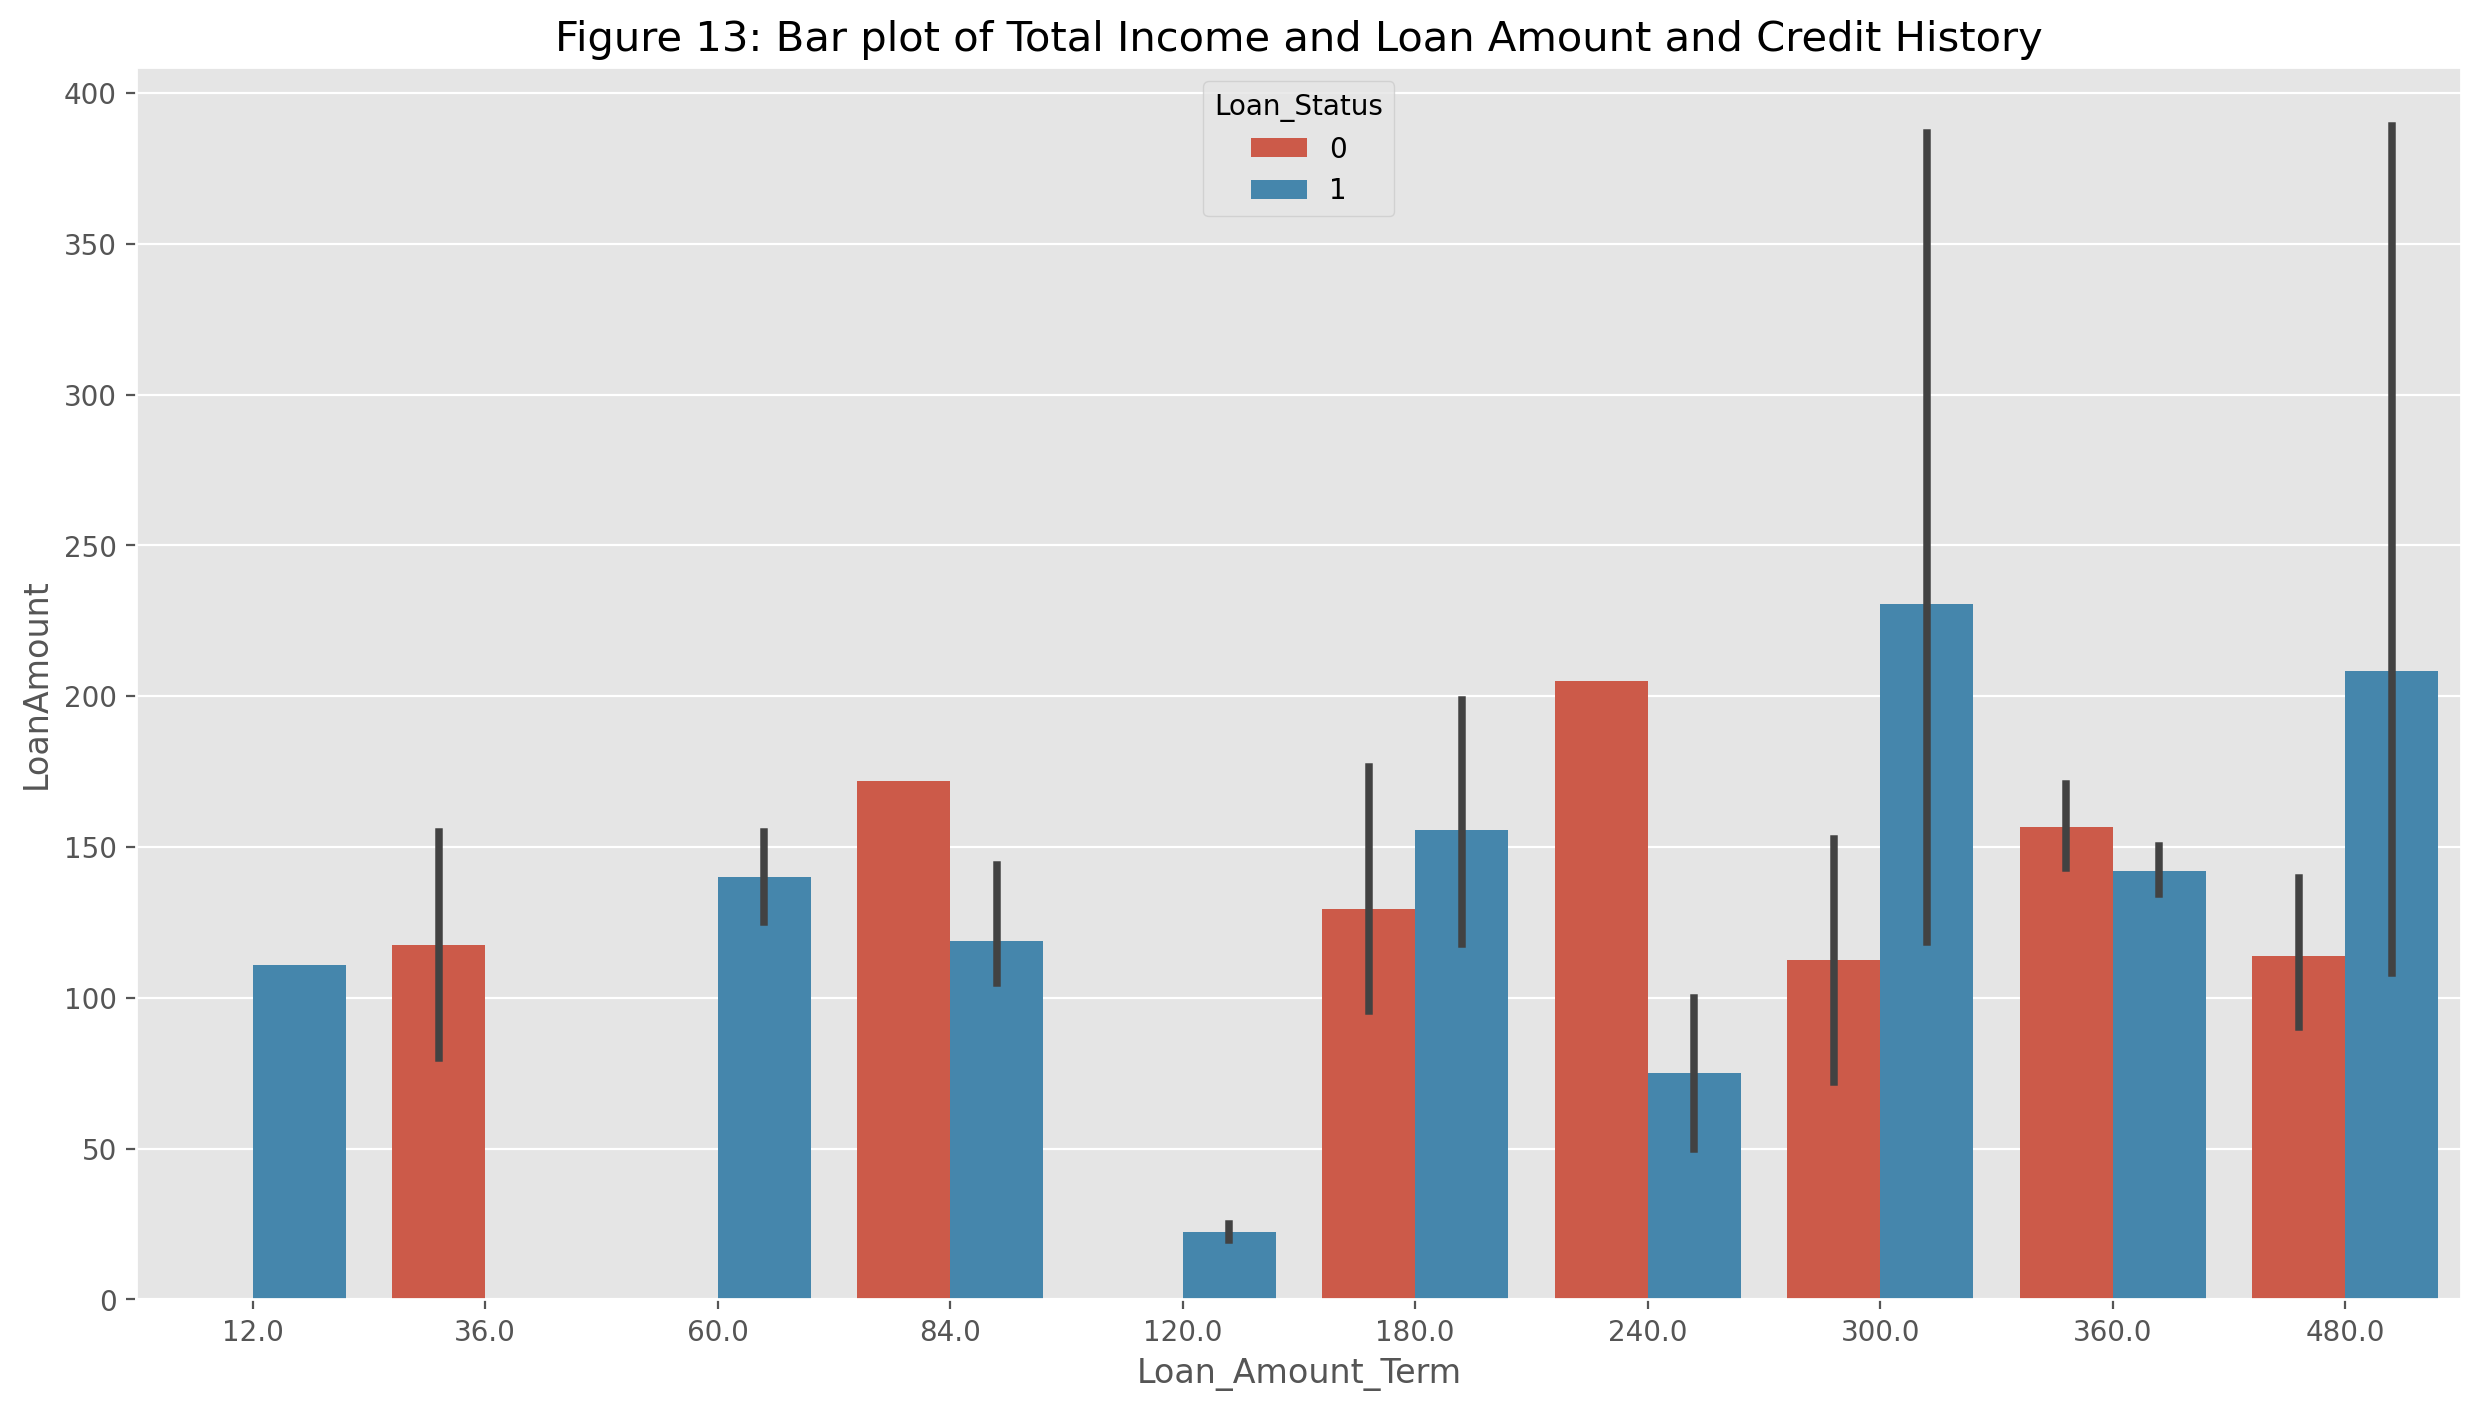

In [35]:
# Figure 13: Barplot of Total Income by Loan Amount and Credit History
plt.figure(figsize = (15,8))
sns.barplot(x=df['Loan_Amount_Term'], y=df['LoanAmount'],
            hue = df['Loan_Status'])
plt.title('Figure 13: Bar plot of Total Income and Loan Amount and Credit History', fontsize = 15)
plt.show();

The bar plot of loan amount term, loan amount and loan status shows the relationship between the two feature variables and the target variable. There is no clear pattern or trend observed in the bar plot. For certain loan amount terms such as 12.0, 36.0, 60.0 and 120.0, they have a 100% rejection or acceptance rate. There were also some bars where the error bars are absent. For the loan amount term of 12.0 and loan status of 1, no error bar can be observed indicating that there is only one such data point for each of these cases. This can also be observed for when the loan amount term is 84.0 and loan status is 0 and when the loan amount term is 240.0 and loan status is 0. The error bars also indicate the spread of the data. When the loan amount term is 300.0 and 480.0 and the loan status is 1, the error bars are longer than the others indicating that they have a wider range.

## Summary and Conclusions <a id='sum'></a>

In conclusion, in the phase 1 report we has done data cleaning and preprocessing to prepare our dataset for the modeling in phase 2. In the data cleaning and processing, we drop some of the features that are irrelevant for our analysis. The features that are dropped include Loan_ID and Gender. Furthermore, we create a new feature that combine two features in the dataset as these two features have similar information. The new feature is called Total_Income which is a combination of the Applicant_Income and CoApplicant_Income. In addition, we check the data type, white spaces, and missing values in the data set. From the outputs, it shows that the data set has the correct data type for each feature and there isn't any white spaces within the columns. However, the output of the missing values reveal that there are many features that have missing values in it. The features that has missing values are replaced with the median or mode of the features related. We also check the unique values for the categorical features in the data set to ensure that there aren't any repetitive values in it. Moreover, we do a descriptive analysis for all features. According to the numerical descriptive analysis, it can be seen that there is a high variability within the features due to the high standard deviation and range.

From the plots we conclude that most applicants lived in the semi-urban area, although there are many outliers of total income and loan amount can be seen at figure 2 and figure 3, we cannot remove these outliers due to the nature of data. Besides that, 85.5% applicants have credit history. Figure 5 shows that the applicants with higher total income will have a higher chance of getting their loan approved. Figure 6 shows that married applicants have a higher total income. Furthermore, higher loan amount is associated with higher total income. Applicants with credit history have a greater chance of getting their loan approved and also have higher total income. In addition, the applicants who are graduated and not self employed have higher total income compared to those who are not graduated and not self employed. Likewise, the applicants who are graduated have higher total income and require greater loan amount than those are not graduated. From the analysis of three-variable visualizations, it can be observed that there is no clear pattern or trend. Therefore, we conclude that prediction of loan approval is not a straightforward solution and requires more features in order to build a model that could provide an accurate and fast prediction for an applicant. 

## References <a id='ref'></a>

Devzohaib.(2023). *Eligibility Prediction for Loan*. Kaggle. https://www.kaggle.com/datasets/devzohaib/eligibility-prediction-for-loan/data